# Chapter 2. Graph Theory

In [ ]:
import networkx as nx
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

In [ ]:
DG = nx.DiGraph()
DG.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

In [ ]:
WG = nx.Graph()
WG.add_edges_from([('A', 'B', {'weight': 10}), ('A', 'C', {'weight': 20}), ('B', 'D', {'weight': 30}), \
                   ('B', 'E', {'weight': 40}), ('C', 'F', {'weight': 50}), ('C', 'G', {'weight': 60})])

In [ ]:
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
print(f"Is graph 1 connected? {nx.is_connected(G1)}")

G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])
print(f"Is graph 1 connected? {nx.is_connected(G2)}")

Is graph 1 connected? False
Is graph 1 connected? True


In [ ]:
print(f"deg(A) = {G.degree['A']}")

print(f"deg^-(A) = {DG.in_degree['A']}")
print(f"deg^+(A) = {DG.out_degree['A']}")

deg(A) = 2
deg^-(A) = 0
deg^+(A) = 2


In [ ]:
print(f"Degree centrality = {nx.degree_centrality(G)}")
print(f"Closness centrality = {nx.closeness_centrality(G)}")
print(f"Betweenness centrality = {nx.betweenness_centrality(G)}")

Degree centrality = {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closness centrality = {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Betweenness centrality = {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


In [ ]:
def bfs(graph, node):
    visited, queue = [node], [node]
    while queue:
        node = queue.pop(0)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append(neighbor)
    return visited

bfs(G, 'A')

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
visited = []

def dfs(visited, graph, node):
    if node not in visited:
        visited.append(node)
        for neighbor in graph[node]:
            visited = dfs(visited, graph, neighbor)
    return visited

dfs(visited, G, 'A')

['A', 'B', 'D', 'E', 'C', 'F', 'G']

# Chapter 3. DeepWalk

In [ ]:
import numpy as np

CONTEXT_SIZE = 2

text = """Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nunc eu sem
scelerisque, dictum eros aliquam, accumsan quam. Pellentesque tempus, lorem ut
semper fermentum, ante turpis accumsan ex, sit amet ultricies tortor erat quis
nulla. Nunc consectetur ligula sit amet purus porttitor, vel tempus tortor
scelerisque. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices
posuere cubilia curae; Quisque suscipit ligula nec faucibus accumsan. Duis
vulputate massa sit amet viverra hendrerit. Integer maximus quis sapien id
convallis. Donec elementum placerat ex laoreet gravida. Praesent quis enim
facilisis, bibendum est nec, pharetra ex. Etiam pharetra congue justo, eget
imperdiet diam varius non. Mauris dolor lectus, interdum in laoreet quis,
faucibus vitae velit. Donec lacinia dui eget maximus cursus. Class aptent taciti
sociosqu ad litora torquent per conubia nostra, per inceptos himenaeos. Vivamus
tincidunt velit eget nisi ornare convallis. Pellentesque habitant morbi
tristique senectus et netus et malesuada fames ac turpis egestas. Donec
tristique ultrices tortor at accumsan.
""".split()

skipgrams = []
for i in range(CONTEXT_SIZE, len(text) - CONTEXT_SIZE):
    array = [text[j] for j in np.arange(i - CONTEXT_SIZE, i + CONTEXT_SIZE + 1) if j != i]
    skipgrams.append((text[i], array))

print(skipgrams[0:2])

[('dolor', ['Lorem', 'ipsum', 'sit', 'amet,']), ('sit', ['ipsum', 'dolor', 'amet,', 'consectetur'])]


In [ ]:
vocab = set(text)
VOCAB_SIZE = len(vocab)
print(f"Length of vocabulary = {VOCAB_SIZE}")

Length of vocabulary = 121


In [ ]:
!pip install -qU gensim
from gensim.models.word2vec import Word2Vec

model = Word2Vec([text], sg=1, vector_size=10, min_count=0, window=2, workers=2, seed=0)

print(f'Shape of W_embed: {model.wv.vectors.shape}')

model.train([text], total_examples=model.corpus_count, epochs=10)

print('Word embedding =')
print(model.wv[0])

Shape of W_embed: (121, 10)
Word embedding =
[ 0.07156403  0.03257632  0.00209916 -0.04374931 -0.03398107 -0.08656936
 -0.09047253 -0.0955243  -0.06482638  0.0660186 ]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.erdos_renyi_graph(10, 0.3, seed=1, directed=False)

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


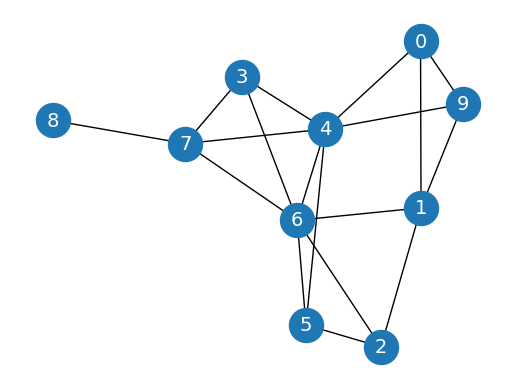

In [ ]:
plt.figure()
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white')

In [ ]:
def random_walk(start, length):
    walk = [str(start)]

    for i in range(length):
        neighbors = [node for node in G.neighbors(start)]
        next_node = np.random.choice(neighbors, 1)[0]
        walk.append(str(next_node))
        start = next_node

    return walk

print(random_walk(0, 10))

['0', '1', '0', '4', '3', '4', '3', '4', '3', '6', '5']


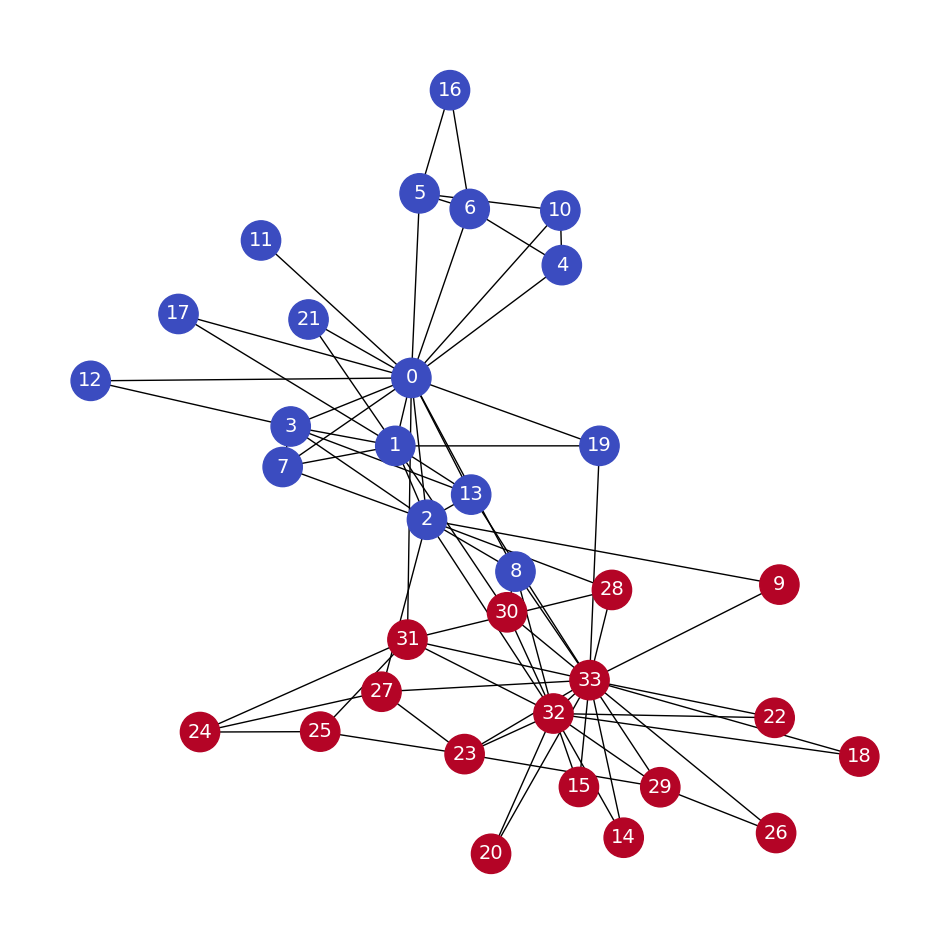

In [ ]:
G = nx.karate_club_graph()

labels = []
for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)

plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_color=labels,
                 node_size=800,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white')

In [ ]:
walks = []
for node in G.nodes:
    for _ in range(80):
        walks.append(random_walk(node, 10))

print(walks[0])

['0', '3', '13', '1', '19', '0', '17', '0', '8', '32', '15']


In [ ]:
model = Word2Vec(walks, hs=1, sg=1, vector_size=100, window=10, workers=2, seed=0)

model.train(walks, total_examples=model.corpus_count, epochs=30, report_delay=1)

print('Nodes that are the most similar to node 0:')
for similarity in model.wv.most_similar(positive=['0']):
    print(f'    {similarity}')

Nodes that are the most similar to node 0:
    ('4', 0.6524556279182434)
    ('10', 0.6316837668418884)
    ('11', 0.6296387314796448)
    ('21', 0.60385662317276)
    ('5', 0.5884429812431335)
    ('16', 0.5688573122024536)
    ('7', 0.5623621344566345)
    ('12', 0.5404209494590759)
    ('17', 0.521984875202179)
    ('6', 0.5122649073600769)


In [ ]:
print(f'Similarity between node 0 and 4: {model.wv.similarity("0", "4")}')

Similarity between node 0 and 4: 0.6524556279182434


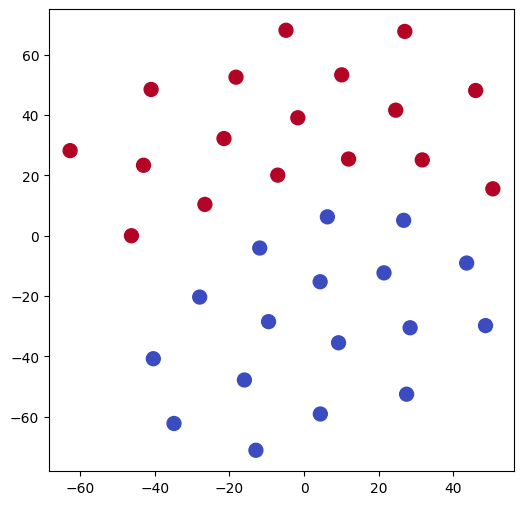

In [ ]:
from sklearn.manifold import TSNE

nodes_wv = np.array([model.wv.get_vector(str(i)) for i in range(len(model.wv))])
labels = np.array(labels)

tsne = TSNE(n_components=2,
            learning_rate='auto',
            init='pca',
            random_state=0).fit_transform(nodes_wv)

plt.figure(figsize=(6,6))
plt.scatter(tsne[:, 0], tsne[:, 1], s=100, c=labels, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

train_mask = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
test_mask = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33]

clf = RandomForestClassifier(random_state=0)
clf.fit(nodes_wv[train_mask], labels[train_mask])

y_pred = clf.predict(nodes_wv[test_mask])
accuracy_score(y_pred, labels[test_mask])

0.9090909090909091

# Chapter 4. Node2Vec

In [ ]:
import networkx as nx
import random
random.seed(0)
import numpy as np
np.random.seed(0)

G = nx.erdos_renyi_graph(10, 0.3, seed=1, directed=False)

In [ ]:
def next_node(previous, current, p, q):
    neighbors = list(G.neighbors(current))
    alphas = []

    for neighbor in neighbors:
        if neighbor == previous:
            alpha = 1/p
        elif G.has_edge(neighbor, previous):
            alpha = 1
        else:
            alpha = 1/q
        alphas.append(alpha)

    probs = [alpha / sum(alphas) for alpha in alphas]

    next = np.random.choice(neighbors, size=1, p=probs)[0]
    return next

In [ ]:
def random_walk(start, length, p, q):
    walk = [start]

    for i in range(length):
        current = walk[-1]
        previous = walk[-2] if len(walk) > 1 else None
        next = next_node(previous, current, p, q)
        walk.append(next)

    return [str(x) for x in walk]

In [ ]:
print(random_walk(0, 8, p=1, q=1))
print(random_walk(0, 8, p=1, q=10))
print(random_walk(0, 8, p=10, q=1))

['0', '4', '6', '1', '6', '4', '6', '7', '6']
['0', '4', '3', '7', '3', '7', '6', '3', '4']
['0', '1', '6', '4', '5', '6', '1', '0', '4']


In [ ]:
!pip install -qI gensim==3.8.0

from gensim.models.word2vec import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

G = nx.karate_club_graph()

labels = []
for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)

walks = []
for node in G.nodes:
    for _ in range(80):
        walks.append(random_walk(node, 10, 3, 2))

node2vec = Word2Vec(walks, hs=1, sg=1, vector_size=100, window=10, workers=2, min_count=1, seed=0)

node2vec.train(walks, total_examples=node2vec.corpus_count, epochs=30, report_delay=1)

train_mask = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
train_mask_str = [str(x) for x in train_mask]
test_mask = [0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33]
test_mask_str = [str(x) for x in test_mask]
labels = np.array(labels)

clf = RandomForestClassifier(random_state=0)
clf.fit(node2vec.wv[train_mask_str], labels[train_mask])

y_pred = clf.predict(node2vec.wv[test_mask_str])
acc = accuracy_score(y_pred, labels[test_mask])
print(f'Node2Vec accuracy = {acc*100:.2f}%')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 62.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


Node2Vec accuracy = 95.45%


In [ ]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

url = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'
with urlopen(url) as zurl:
    with ZipFile(BytesIO(zurl.read())) as zfile:
        zfile.extractall('.')

In [ ]:
import pandas as pd

ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'])
ratings

user_id  movie_id  rating  unix_timestamp
0          196       242       3       881250949
1          186       302       3       891717742
2           22       377       1       878887116
3          244        51       2       880606923
4          166       346       1       886397596
...        ...       ...     ...             ...
99995      880       476       3       880175444
99996      716       204       5       879795543
99997      276      1090       1       874795795
99998       13       225       2       882399156
99999       12       203       3       879959583

[100000 rows x 4 columns]

In [ ]:
movies = pd.read_csv('ml-100k/u.item', sep='|', usecols=range(2), names=['movie_id', 'title'], encoding='latin-1')
movies

movie_id                                      title
0            1                           Toy Story (1995)
1            2                           GoldenEye (1995)
2            3                          Four Rooms (1995)
3            4                          Get Shorty (1995)
4            5                             Copycat (1995)
...        ...                                        ...
1677      1678                          Mat' i syn (1997)
1678      1679                           B. Monkey (1998)
1679      1680                       Sliding Doors (1998)
1680      1681                        You So Crazy (1994)
1681      1682  Scream of Stone (Schrei aus Stein) (1991)

[1682 rows x 2 columns]

In [ ]:
ratings = ratings[ratings.rating >= 4]
ratings

user_id  movie_id  rating  unix_timestamp
5          298       474       4       884182806
7          253       465       5       891628467
11         286      1014       5       879781125
12         200       222       5       876042340
16         122       387       5       879270459
...        ...       ...     ...             ...
99988      421       498       4       892241344
99989      495      1091       4       888637503
99990      806       421       4       882388897
99991      676       538       4       892685437
99996      716       204       5       879795543

[55375 rows x 4 columns]

In [ ]:
from collections import defaultdict

pairs = defaultdict(int)

for group in ratings.groupby('user_id'):

    user_movies = list(group[1]['movie_id'])

    for i in range(len(user_movies)):
        for j in range(i+1, len(user_movies)):
            pairs[(user_movies[i], user_movies[j])] += 1

In [ ]:
G = nx.Graph()

for pair in pairs:
    movie1, movie2 = pair
    score = pairs[pair]

    if score >= 20:
        G.add_edge(movie1, movie2, weight=score)

print("Total number of graph nodes:", G.number_of_nodes())
print("Total number of graph edges:", G.number_of_edges())

Total number of graph nodes: 410
Total number of graph edges: 14936


In [ ]:
!pip install node2vec
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=64, walk_length=20, num_walks=200, p=2, q=1, workers=1)

model = node2vec.fit(window=10, min_count=1, batch_words=4)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.4 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
  Attempting uninstall: gensim
    Found existing installation: gensim 3.8.0
    Uninstalling gensim-3.8.0:
      Successfully uninstalled gensim-3.8.0


Computing transition probabilities:   0%|          | 0/410 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [01:06<00:00,  2.99it/s]


In [ ]:
def recommend(movie):
    movie_id = str(movies[movies.title == movie].movie_id.values[0])
    for id in model.wv.most_similar(movie_id)[:5]:
        title = movies[movies.movie_id == int(id[0])].title.values[0]
        print(f'{title}: {id[1]:.2f}')

recommend('Star Wars (1977)')

Return of the Jedi (1983): 0.61
Raiders of the Lost Ark (1981): 0.55
Godfather, The (1972): 0.49
Indiana Jones and the Last Crusade (1989): 0.46
White Squall (1996): 0.44


# Chapter 5. Vanilla GNN

In [ ]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='.', name='Cora')

data = dataset[0]

print(f'Dataset: {dataset}')
print('---------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...


Dataset: Cora()
---------------
Number of graphs: 1
Number of nodes: 2708
Number of features: 1433
Number of classes: 7


Done!


In [ ]:
print(f'Graph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Graph:
------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


In [ ]:
from torch_geometric.datasets import FacebookPagePage

dataset = FacebookPagePage(root='.')

data = dataset[0]

print(f'Dataset: {dataset}')
print('---------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

Dataset: FacebookPagePage()
---------------
Number of graphs: 1
Number of nodes: 22470
Number of features: 128
Number of classes: 4

Graph:
------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: True


In [ ]:
import torch_geometric.transforms as T
dataset = Planetoid(root='.', name='Cora')
data = dataset[0]

import pandas as pd

df_x = pd.DataFrame(data.x.numpy())
df_x['label'] = pd.DataFrame(data.y)

In [ ]:
def accuracy(y_pred, y_true):
    return torch.sum(y_pred == y_true) / len(y_true)

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F

class MLP(torch.nn.Module):

    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.linear1 = Linear(dim_in, dim_h)
        self.linear2 = Linear(dim_h, dim_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        return F.log_softmax(x, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [ ]:
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)

mlp.fit(data, epochs=100)

acc = mlp.test(data)
print(f'MLP test accuracy: {acc*100:.2f}%')

MLP(
  (linear1): Linear(in_features=1433, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=7, bias=True)
)
Epoch   0 | Train Loss: 1.959 | Train Acc: 14.29% | Val Loss: 2.00 | Val Acc: 12.40%
Epoch  20 | Train Loss: 0.110 | Train Acc: 100.00% | Val Loss: 1.46 | Val Acc: 49.40%
Epoch  40 | Train Loss: 0.014 | Train Acc: 100.00% | Val Loss: 1.44 | Val Acc: 51.00%
Epoch  60 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.40 | Val Acc: 53.80%
Epoch  80 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.37 | Val Acc: 55.40%
Epoch 100 | Train Loss: 0.009 | Train Acc: 100.00% | Val Loss: 1.34 | Val Acc: 54.60%
MLP test accuracy: 53.40%


In [ ]:
class VanillaGNNLayer(torch.nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.linear = Linear(dim_in, dim_out, bias=False)

    def forward(self, x, adjacency):
        x = self.linear(x)
        x = torch.sparse.mm(adjacency, x)
        return x

In [ ]:
from torch_geometric.utils import to_dense_adj

adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency))
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 1., 1.]])

In [ ]:
class VanillaGNN(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gnn1 = VanillaGNNLayer(dim_in, dim_h)
        self.gnn2 = VanillaGNNLayer(dim_h, dim_out)

    def forward(self, x, adjacency):
        h = self.gnn1(x, adjacency)
        h = torch.relu(h)
        h = self.gnn2(h, adjacency)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)
        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, adjacency)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()
            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, adjacency)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [ ]:
gnn = VanillaGNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)
gnn.fit(data, epochs=100)
acc = gnn.test(data)
print(f'\nGNN test accuracy: {acc*100:2f}%')

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=1433, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=7, bias=False)
  )
)
Epoch   0 | Train Loss: 1.991 | Train Acc: 15.71% | Val Loss: 2.11 | Val Acc: 9.40%
Epoch  20 | Train Loss: 0.065 | Train Acc: 99.29% | Val Loss: 1.47 | Val Acc: 76.80%
Epoch  40 | Train Loss: 0.014 | Train Acc: 100.00% | Val Loss: 2.11 | Val Acc: 75.40%
Epoch  60 | Train Loss: 0.007 | Train Acc: 100.00% | Val Loss: 2.22 | Val Acc: 75.40%
Epoch  80 | Train Loss: 0.004 | Train Acc: 100.00% | Val Loss: 2.20 | Val Acc: 76.80%
Epoch 100 | Train Loss: 0.003 | Train Acc: 100.00% | Val Loss: 2.19 | Val Acc: 77.00%

GNN test accuracy: 76.599998%


In [ ]:
dataset = FacebookPagePage(root=".")
data = dataset[0]
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency))
adjacency

mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)
mlp.fit(data, epochs=100)
acc = mlp.test(data)
print(f'\nMLP test accuracy: {acc*100:.2f}%\n')

gnn = VanillaGNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)
gnn.fit(data, epochs=100)
acc = gnn.test(data)
print(f'\nGNN test accuracy: {acc*100:.2f}%')

MLP(
  (linear1): Linear(in_features=128, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=4, bias=True)
)
Epoch   0 | Train Loss: 1.401 | Train Acc: 28.11% | Val Loss: 1.40 | Val Acc: 28.91%
Epoch  20 | Train Loss: 0.671 | Train Acc: 73.47% | Val Loss: 0.68 | Val Acc: 72.94%
Epoch  40 | Train Loss: 0.579 | Train Acc: 76.95% | Val Loss: 0.61 | Val Acc: 74.89%
Epoch  60 | Train Loss: 0.549 | Train Acc: 78.20% | Val Loss: 0.60 | Val Acc: 75.59%
Epoch  80 | Train Loss: 0.533 | Train Acc: 78.76% | Val Loss: 0.60 | Val Acc: 75.39%
Epoch 100 | Train Loss: 0.520 | Train Acc: 79.23% | Val Loss: 0.60 | Val Acc: 75.39%

MLP test accuracy: 75.33%

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=128, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=4, bias=False)
  )
)
Epoch   0 | Train Loss: 176.683 | Train Acc: 28.31% | Val Loss: 173.10 | Val Acc: 28.41%
Epoch  20 | Train Loss: 6.675 

# Chapter 6. GCN

In [ ]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

torch.manual_seed(1)
torch.cuda.manual_seed(1)
torch.cuda.manual_seed_all(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 66.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np

D = np.array([
    [3, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 2, 0],
    [0, 0, 0, 2]
])

np.linalg.inv(D)

array([[0.33333333, 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ]])

In [ ]:
np.linalg.inv(D + np.identity(4))

array([[0.25      , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 0.33333333]])

In [ ]:
A = np.array([
    [1, 1, 1, 1],
    [1, 1, 0, 0],
    [1, 0, 1, 1],
    [1, 0, 1, 1]
])

print(np.linalg.inv(D + np.identity(4)) @ A)
print(A @ np.linalg.inv(D + np.identity(4)))

[[0.25       0.25       0.25       0.25      ]
 [0.5        0.5        0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.33333333 0.         0.33333333 0.33333333]]
[[0.25       0.5        0.33333333 0.33333333]
 [0.25       0.5        0.         0.        ]
 [0.25       0.         0.33333333 0.33333333]
 [0.25       0.         0.33333333 0.33333333]]


Processing...
Done!


<BarContainer object of 37 artists>

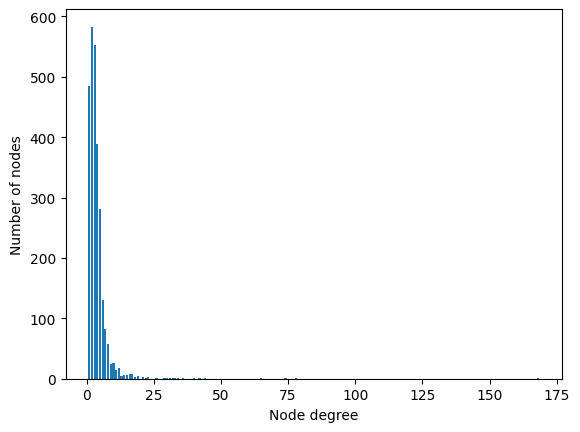

In [ ]:
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import degree
from collections import Counter
import matplotlib.pyplot as plt

dataset = Planetoid(root='.', name='Cora')
data = dataset[0]

degrees = degree(data.edge_index[0]).numpy()

numbers = Counter(degrees)

fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
plt.bar(numbers.keys(), numbers.values())

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

def accuracy(pred_y, y):
    return ((pred_y == y).sum() / len(y)).item()

class GCN(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_out)

    def forward(self, x, edge_index):
        h = self.gcn1(x, edge_index)
        h = torch.relu(h)
        h = self.gcn2(h, edge_index)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

gcn = GCN(dataset.num_features, 16, dataset.num_classes)
print(gcn)
gcn.fit(data, epochs=100)

acc = gcn.test(data)
print(f'GCN test accuracy: {acc*100:.2f}%')

GCN(
  (gcn1): GCNConv(1433, 16)
  (gcn2): GCNConv(16, 7)
)
Epoch   0 | Train Loss: 1.949 | Train Acc: 14.29% | Val Loss: 1.96 | Val Acc: 12.20%
Epoch  20 | Train Loss: 0.104 | Train Acc: 100.00% | Val Loss: 0.79 | Val Acc: 76.40%
Epoch  40 | Train Loss: 0.016 | Train Acc: 100.00% | Val Loss: 0.75 | Val Acc: 76.00%
Epoch  60 | Train Loss: 0.016 | Train Acc: 100.00% | Val Loss: 0.72 | Val Acc: 77.80%
Epoch  80 | Train Loss: 0.018 | Train Acc: 100.00% | Val Loss: 0.72 | Val Acc: 77.80%
Epoch 100 | Train Loss: 0.017 | Train Acc: 100.00% | Val Loss: 0.72 | Val Acc: 76.80%
GCN test accuracy: 80.00%


Processing...
Done!


<BarContainer object of 233 artists>

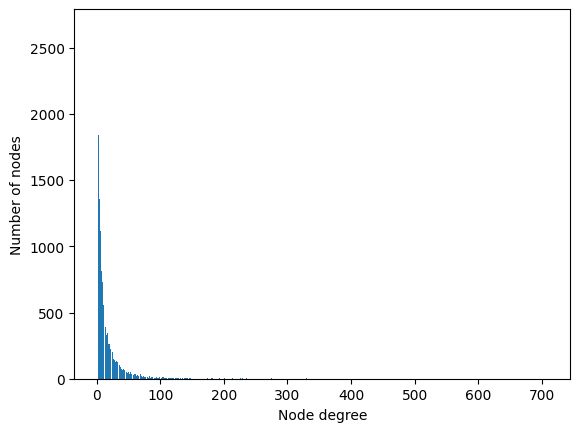

In [ ]:
from torch_geometric.datasets import FacebookPagePage

# Import dataset from PyTorch Geometric
dataset = FacebookPagePage(root=".")
data = dataset[0]

# Create masks
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

# Get list of degrees for each node
degrees = degree(data.edge_index[0]).numpy()

# Count the number of nodes for each degree
numbers = Counter(degrees)

# Bar plot
fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
plt.bar(numbers.keys(), numbers.values())

In [ ]:
dataset = FacebookPagePage(root=".")
data = dataset[0]
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

# Train GCN
gcn = GCN(dataset.num_features, 16, dataset.num_classes)
print(gcn)
gcn.fit(data, epochs=100)
acc = gcn.test(data)
print(f'\nGCN test accuracy: {acc*100:.2f}%')

GCN(
  (gcn1): GCNConv(128, 16)
  (gcn2): GCNConv(16, 4)
)
Epoch   0 | Train Loss: 1.486 | Train Acc: 24.74% | Val Loss: 1.49 | Val Acc: 24.21%
Epoch  20 | Train Loss: 0.439 | Train Acc: 84.54% | Val Loss: 0.44 | Val Acc: 85.09%
Epoch  40 | Train Loss: 0.314 | Train Acc: 89.61% | Val Loss: 0.31 | Val Acc: 89.74%
Epoch  60 | Train Loss: 0.273 | Train Acc: 91.47% | Val Loss: 0.27 | Val Acc: 91.45%
Epoch  80 | Train Loss: 0.251 | Train Acc: 92.35% | Val Loss: 0.25 | Val Acc: 92.25%
Epoch 100 | Train Loss: 0.236 | Train Acc: 92.91% | Val Loss: 0.24 | Val Acc: 92.40%

GCN test accuracy: 91.37%


In [ ]:
from torch_geometric.datasets import WikipediaNetwork
import torch_geometric.transforms as T

dataset = WikipediaNetwork(root=".", name="chameleon", transform = T.RandomNodeSplit(num_val=200, num_test=500))
data = dataset[0]

# Print information about the dataset
print(f'Dataset: {dataset}')
print('-------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of unique features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Processing...


Dataset: WikipediaNetwork()
-------------------
Number of graphs: 1
Number of nodes: 2277
Number of unique features: 2325
Number of classes: 5

Graph:
------
Edges are directed: True
Graph has isolated nodes: False
Graph has loops: True


Done!


In [ ]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

url = 'https://snap.stanford.edu/data/wikipedia.zip'
with urlopen(url) as zurl:
    with ZipFile(BytesIO(zurl.read())) as zfile:
        zfile.extractall('.')

In [ ]:
import pandas as pd

df = pd.read_csv('wikipedia/chameleon/musae_chameleon_target.csv')
values = np.log10(df['target'])
data.y = torch.tensor(values)
data.y

tensor([2.2330, 3.9079, 3.9329,  ..., 1.9956, 4.3598, 2.4409],
       dtype=torch.float64)

<BarContainer object of 63 artists>

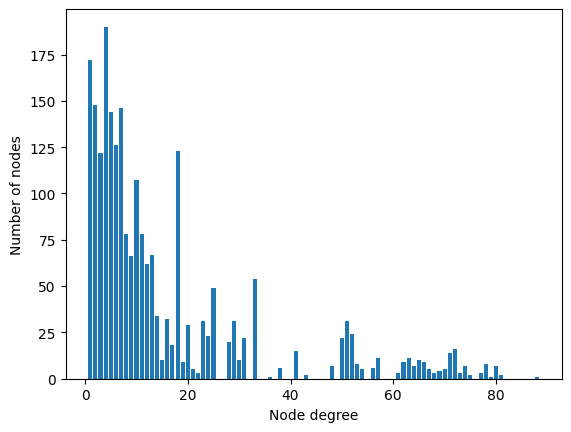

In [ ]:
from torch_geometric.utils import degree
from collections import Counter

degrees = degree(data.edge_index[0]).numpy()

numbers = Counter(degrees)

fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
plt.bar(numbers.keys(), numbers.values())

<ipython-input-16-b1a31cbd5613>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['target'], fit=norm)


<Axes: xlabel='target', ylabel='Density'>

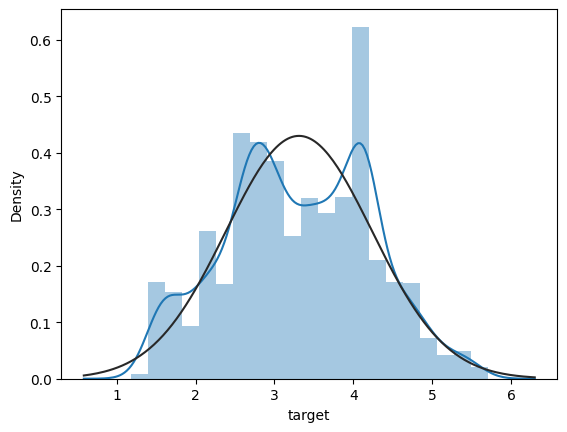

In [ ]:
import seaborn as sns
from scipy.stats import norm
df['target'] = values
sns.distplot(df['target'], fit=norm)

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h*4)
        self.gcn2 = GCNConv(dim_h*4, dim_h*2)
        self.gcn3 = GCNConv(dim_h*2, dim_h)
        self.linear = torch.nn.Linear(dim_h, dim_out)

    def forward(self, x, edge_index):
        h = self.gcn1(x, edge_index)
        h = torch.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.gcn2(h, edge_index)
        h = torch.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.gcn3(h, edge_index)
        h = torch.relu(h)
        h = self.linear(h)
        return h

    def fit(self, data, epochs):
        optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.02,
                                      weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = F.mse_loss(out.squeeze()[data.train_mask], data.y[data.train_mask].float())
            loss.backward()
            optimizer.step()
            if epoch % 20 == 0:
                val_loss = F.mse_loss(out.squeeze()[data.val_mask], data.y[data.val_mask])
                print(f"Epoch {epoch:>3} | Train Loss: {loss:.5f} | Val Loss: {val_loss:.5f}")

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        return F.mse_loss(out.squeeze()[data.test_mask], data.y[data.test_mask].float())

gcn = GCN(dataset.num_features, 128, 1)
print(gcn)
gcn.fit(data, epochs=200)

loss = gcn.test(data)
print(f'GCN test loss: {loss:.5f}')

GCN(
  (gcn1): GCNConv(2325, 512)
  (gcn2): GCNConv(512, 256)
  (gcn3): GCNConv(256, 128)
  (linear): Linear(in_features=128, out_features=1, bias=True)
)
Epoch   0 | Train Loss: 11.49413 | Val Loss: 11.01125
Epoch  20 | Train Loss: 12.02500 | Val Loss: 11.50769
Epoch  40 | Train Loss: 7.52470 | Val Loss: 6.58164
Epoch  60 | Train Loss: 1.97397 | Val Loss: 1.83004
Epoch  80 | Train Loss: 0.73649 | Val Loss: 0.69302
Epoch 100 | Train Loss: 0.60135 | Val Loss: 0.65561
Epoch 120 | Train Loss: 0.54772 | Val Loss: 0.65476
Epoch 140 | Train Loss: 0.53446 | Val Loss: 0.61593
Epoch 160 | Train Loss: 0.50915 | Val Loss: 0.68321
Epoch 180 | Train Loss: 0.48194 | Val Loss: 0.60020
Epoch 200 | Train Loss: 0.44144 | Val Loss: 0.63173
GCN test loss: 0.62815


MSE = 0.6281 | RMSE = 0.7926 | MAE = 0.6217


[Text(0.5, 0, 'Ground truth'), Text(0, 0.5, 'Predicted values')]

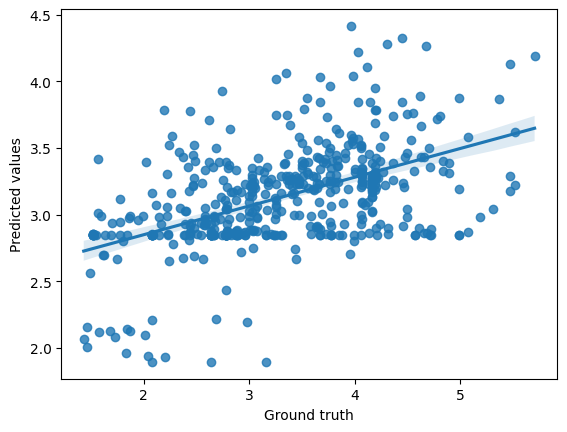

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

out = gcn(data.x, data.edge_index)
y_pred = out.squeeze()[data.test_mask].detach().numpy()
mse = mean_squared_error(data.y[data.test_mask], y_pred)
mae = mean_absolute_error(data.y[data.test_mask], y_pred)

print('=' * 43)
print(f'MSE = {mse:.4f} | RMSE = {np.sqrt(mse):.4f} | MAE = {mae:.4f}')
print('=' * 43)

fig = sns.regplot(x=data.y[data.test_mask].numpy(), y=y_pred)
fig.set(xlabel='Ground truth', ylabel='Predicted values')

# Chapter 7. GAT

In [ ]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

torch.manual_seed(1)
torch.cuda.manual_seed(1)
torch.cuda.manual_seed_all(1)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
import numpy as np
np.random.seed(0)

A = np.array([
    [1, 1, 1, 1],
    [1, 1, 0, 0],
    [1, 0, 1, 1],
    [1, 0, 1, 1]
])
A

array([[1, 1, 1, 1],
       [1, 1, 0, 0],
       [1, 0, 1, 1],
       [1, 0, 1, 1]])

In [ ]:
X = np.random.uniform(-1, 1, (4, 4))
W = np.random.uniform(-1, 1, (2, 4))
W_att = np.random.uniform(-1, 1, (1, 4))
connections = np.where(A > 0)
np.concatenate([(X @ W.T)[connections[0]], (X @ W.T)[connections[1]]], axis=1)

array([[ 0.4846548 ,  0.11217229,  0.4846548 ,  0.11217229],
       [ 0.4846548 ,  0.11217229, -0.21172146,  0.7907492 ],
       [ 0.4846548 ,  0.11217229,  0.3123497 ,  0.57339397],
       [ 0.4846548 ,  0.11217229,  1.40231579,  0.5117914 ],
       [-0.21172146,  0.7907492 ,  0.4846548 ,  0.11217229],
       [-0.21172146,  0.7907492 , -0.21172146,  0.7907492 ],
       [ 0.3123497 ,  0.57339397,  0.4846548 ,  0.11217229],
       [ 0.3123497 ,  0.57339397,  0.3123497 ,  0.57339397],
       [ 0.3123497 ,  0.57339397,  1.40231579,  0.5117914 ],
       [ 1.40231579,  0.5117914 ,  0.4846548 ,  0.11217229],
       [ 1.40231579,  0.5117914 ,  0.3123497 ,  0.57339397],
       [ 1.40231579,  0.5117914 ,  1.40231579,  0.5117914 ]])

In [ ]:
a = W_att @ np.concatenate([(X @ W.T)[connections[0]], (X @ W.T)[connections[1]]], axis=1).T

def leaky_relu(x, alpha=0.2):
    return np.maximum(alpha*x, x)

e = leaky_relu(a)

E = np.zeros(A.shape)
E[connections[0], connections[1]] = e[0]

def softmax2D(x, axis):
    e = np.exp(x - np.expand_dims(np.max(x, axis=axis), axis))
    sum = np.expand_dims(np.sum(e, axis=axis), axis)
    return e / sum

W_alpha = softmax2D(E, 1)

H = A.T @ W_alpha @ X @ W.T
H

array([[2.54822501, 1.77391361],
       [1.17638646, 0.91779545],
       [2.02300389, 1.2982195 ],
       [2.02300389, 1.2982195 ]])

In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root=".", name="Cora")
data = dataset[0]

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv
from torch.nn import Linear, Dropout

def accuracy(y_pred, y_true):
    return torch.sum(y_pred == y_true) / len(y_true)

class GAT(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out, heads=8):
        super().__init__()
        self.gat1 = GATv2Conv(dim_in, dim_h, heads=heads)
        self.gat2 = GATv2Conv(dim_h*heads, dim_out, heads=1)

    def forward(self, x, edge_index):
        h = F.dropout(x, p=0.6, training=self.training)
        h = self.gat1(h, edge_index)
        h = F.elu(h)
        h = F.dropout(h, p=0.6, training=self.training)
        h = self.gat2(h, edge_index)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=0.01)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

gat = GAT(dataset.num_features, 32, dataset.num_classes)
gat.fit(data, epochs=100)

acc = gat.test(data)
print(f'GAT test accuracy: {acc*100:.2f}%')

Epoch   0 | Train Loss: 1.962 | Train Acc: 13.57% | Val Loss: 1.96 | Val Acc: 14.60%
Epoch  20 | Train Loss: 0.204 | Train Acc: 97.86% | Val Loss: 0.89 | Val Acc: 72.20%
Epoch  40 | Train Loss: 0.214 | Train Acc: 96.43% | Val Loss: 0.88 | Val Acc: 73.40%
Epoch  60 | Train Loss: 0.171 | Train Acc: 98.57% | Val Loss: 0.85 | Val Acc: 74.60%
Epoch  80 | Train Loss: 0.190 | Train Acc: 99.29% | Val Loss: 0.99 | Val Acc: 69.00%
Epoch 100 | Train Loss: 0.182 | Train Acc: 97.86% | Val Loss: 1.05 | Val Acc: 73.40%
GAT test accuracy: 81.00%


In [ ]:
dataset = Planetoid(root=".", name="CiteSeer")
data = dataset[0]
data

Processing...
Done!


Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])

<BarContainer object of 32 artists>

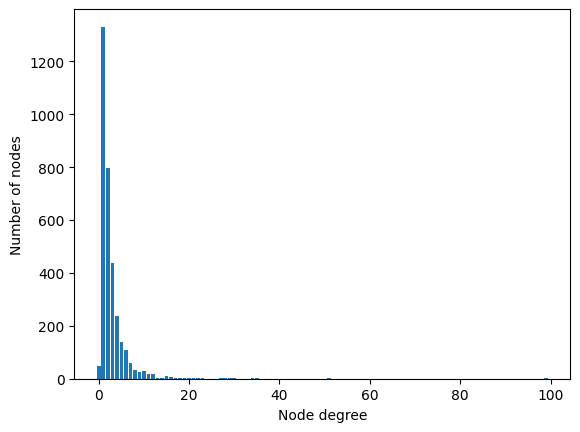

In [ ]:
import matplotlib.pyplot as plt
from torch_geometric.utils import degree
from collections import Counter

degrees = degree(dataset[0].edge_index[0]).numpy()

numbers = Counter(degrees)

fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Number of nodes')
plt.bar(numbers.keys(), numbers.values())

In [ ]:
gat = GAT(dataset.num_features, 16, dataset.num_classes)
print(gat)

gat.fit(data, epochs=100)

acc = gat.test(data)
print(f'GAT test accuracy: {acc*100:.2f}%')

GAT(
  (gat1): GATv2Conv(3703, 16, heads=8)
  (gat2): GATv2Conv(128, 6, heads=1)
)
Epoch   0 | Train Loss: 1.804 | Train Acc: 15.00% | Val Loss: 1.81 | Val Acc: 16.00%
Epoch  20 | Train Loss: 0.188 | Train Acc: 98.33% | Val Loss: 1.13 | Val Acc: 61.60%
Epoch  40 | Train Loss: 0.128 | Train Acc: 99.17% | Val Loss: 1.18 | Val Acc: 62.20%
Epoch  60 | Train Loss: 0.124 | Train Acc: 99.17% | Val Loss: 1.18 | Val Acc: 59.80%
Epoch  80 | Train Loss: 0.121 | Train Acc: 100.00% | Val Loss: 1.14 | Val Acc: 63.80%
Epoch 100 | Train Loss: 0.103 | Train Acc: 100.00% | Val Loss: 1.16 | Val Acc: 61.60%
GAT test accuracy: 71.10%


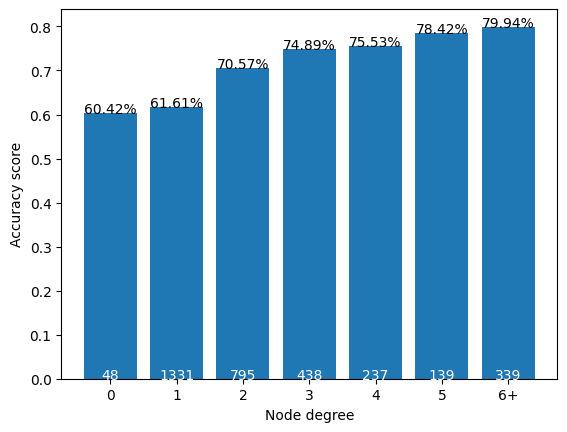

In [ ]:
out = gat(data.x, data.edge_index)

degrees = degree(data.edge_index[0]).numpy()

accuracies = []
sizes = []

for i in range(0, 6):
    mask = np.where(degrees == i)[0]
    accuracies.append(accuracy(out.argmax(dim=1)[mask], data.y[mask]))
    sizes.append(len(mask))

mask = np.where(degrees > 5)[0]
accuracies.append(accuracy(out.argmax(dim=1)[mask], data.y[mask]))
sizes.append(len(mask))

fig, ax = plt.subplots()
ax.set_xlabel('Node degree')
ax.set_ylabel('Accuracy score')
plt.bar(['0', '1', '2', '3', '4', '5', '6+'], accuracies)
for i in range(0, 7):
    plt.text(i, accuracies[i], f'{accuracies[i]*100:.2f}%', ha='center', color='black')
for i in range(0, 7):
    plt.text(i, accuracies[i]//2, sizes[i], ha='center', color='white')

# Chapter 8. GraphSAGE

In [ ]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

torch.manual_seed(-1)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='.', name="Pubmed")
data = dataset[0]

# Print information about the dataset
print(f'Dataset: {dataset}')
print('-------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Training nodes: {sum(data.train_mask).item()}')
print(f'Evaluation nodes: {sum(data.val_mask).item()}')
print(f'Test nodes: {sum(data.test_mask).item()}')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Processing...
Done!


Dataset: Pubmed()
-------------------
Number of graphs: 1
Number of nodes: 19717
Number of features: 500
Number of classes: 3

Graph:
------
Training nodes: 60
Evaluation nodes: 500
Test nodes: 1000
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


In [ ]:
from torch_geometric.loader import NeighborLoader

train_loader = NeighborLoader(
    data,
    num_neighbors=[10,10],
    batch_size=16,
    input_nodes=data.train_mask
)

for i, subgraph in enumerate(train_loader):
    print(f'Subgraph {i}: {subgraph}')

Subgraph 0: Data(x=[517, 500], edge_index=[2, 627], y=[517], train_mask=[517], val_mask=[517], test_mask=[517], input_id=[16], batch_size=16)
Subgraph 1: Data(x=[296, 500], edge_index=[2, 369], y=[296], train_mask=[296], val_mask=[296], test_mask=[296], input_id=[16], batch_size=16)
Subgraph 2: Data(x=[371, 500], edge_index=[2, 445], y=[371], train_mask=[371], val_mask=[371], test_mask=[371], input_id=[16], batch_size=16)
Subgraph 3: Data(x=[231, 500], edge_index=[2, 293], y=[231], train_mask=[231], val_mask=[231], test_mask=[231], input_id=[12], batch_size=12)


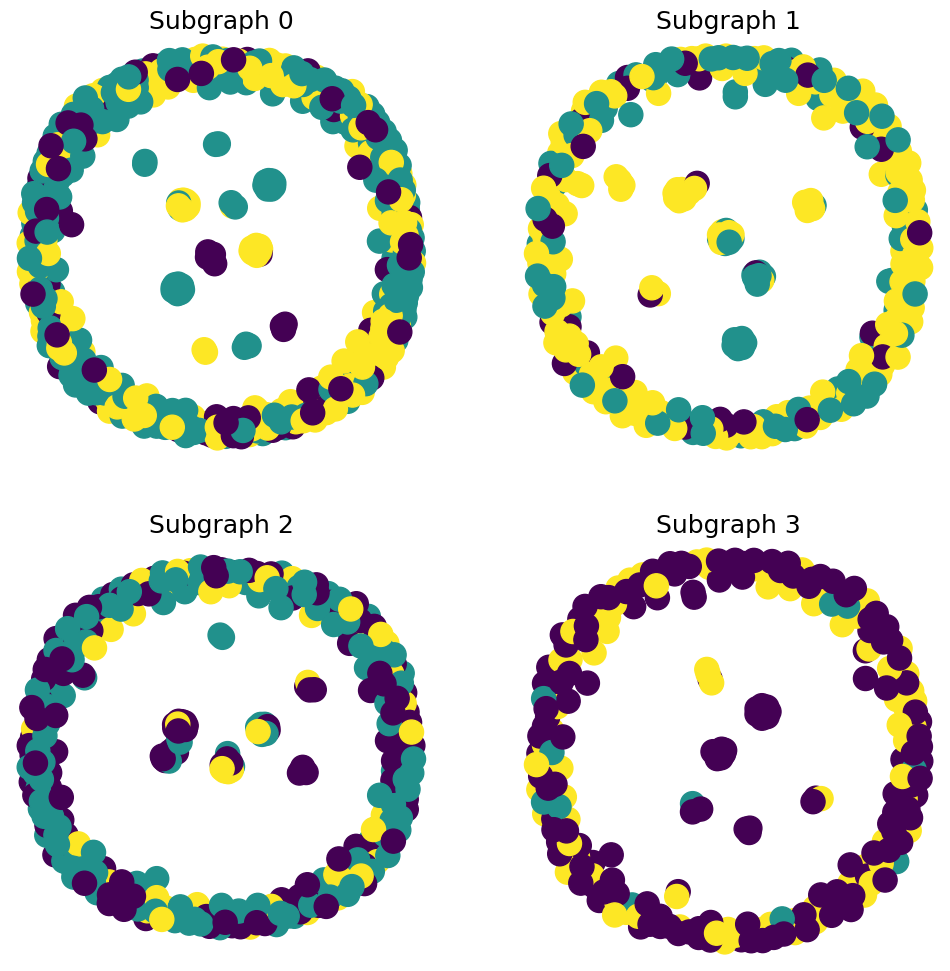

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

fig = plt.figure(figsize=(12,12))
for idx, (subdata, pos) in enumerate(zip(train_loader, [221, 222, 223, 224])):
    G = to_networkx(subdata, to_undirected=True)
    ax = fig.add_subplot(pos)
    ax.set_title(f'Subgraph {idx}', fontsize=18)
    plt.axis('off')
    nx.draw_networkx(G,
                     pos=nx.spring_layout(G, seed=0),
                     with_labels=False,
                     node_color=subdata.y
                     )
plt.show()

In [ ]:
def accuracy(pred_y, y):
    return ((pred_y == y).sum() / len(y)).item()

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv

class GraphSAGE(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.sage1 = SAGEConv(dim_in, dim_h)
        self.sage2 = SAGEConv(dim_h, dim_out)

    def forward(self, x, edge_index):
        h = self.sage1(x, edge_index)
        h = torch.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.sage2(h, edge_index)
        return F.log_softmax(h, dim=1)

    def fit(self, loader, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01)

        self.train()
        for epoch in range(epochs+1):
            total_loss = 0
            acc = 0
            val_loss = 0
            val_acc = 0

            for batch in loader:
                optimizer.zero_grad()
                out = self(batch.x, batch.edge_index)
                loss = criterion(out[batch.train_mask], batch.y[batch.train_mask])
                total_loss += loss.item()
                acc += accuracy(out[batch.train_mask].argmax(dim=1), batch.y[batch.train_mask])
                loss.backward()
                optimizer.step()

                val_loss += criterion(out[batch.val_mask], batch.y[batch.val_mask])
                val_acc += accuracy(out[batch.val_mask].argmax(dim=1), batch.y[batch.val_mask])

            if epoch % 20 == 0:
                print(f'Epoch {epoch:>3} | Train Loss: {loss/len(loader):.3f} | Train Acc: {acc/len(loader)*100:>6.2f}% | Val Loss: {val_loss/len(train_loader):.2f} | Val Acc: {val_acc/len(train_loader)*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

graphsage = GraphSAGE(dataset.num_features, 64, dataset.num_classes)
print(graphsage)
graphsage.fit(train_loader, 200)

acc = graphsage.test(data)
print(f'GraphSAGE test accuracy: {acc*100:.2f}%')

GraphSAGE(
  (sage1): SAGEConv(500, 64, aggr=mean)
  (sage2): SAGEConv(64, 3, aggr=mean)
)
Epoch   0 | Train Loss: 0.324 | Train Acc:  19.67% | Val Loss: 1.10 | Val Acc: 47.08%
Epoch  20 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 0.54 | Val Acc: 82.46%
Epoch  40 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 0.45 | Val Acc: 85.71%
Epoch  60 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 0.45 | Val Acc: 81.57%
Epoch  80 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 0.60 | Val Acc: 77.05%
Epoch 100 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 0.68 | Val Acc: 75.13%
Epoch 120 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 0.62 | Val Acc: 77.37%
Epoch 140 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 0.73 | Val Acc: 70.83%
Epoch 160 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 0.78 | Val Acc: 74.58%
Epoch 180 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 0.81 | Val Acc: 78.65%
Epoch 200 | Train Loss: 0.000 | Train Acc: 100.00

In [ ]:
from torch_geometric.datasets import PPI

train_dataset = PPI(root='.', split='train')
val_dataset = PPI(root='.', split='val')
test_dataset = PPI(root='.', split='test')

Extracting ./ppi.zip
Processing...
Done!


In [ ]:
from torch_geometric.data import Batch
from torch_geometric.loader import NeighborLoader

train_data = Batch.from_data_list(train_dataset)
loader = NeighborLoader(train_data, batch_size=2048, shuffle=True, num_neighbors=[20, 10], num_workers=2, persistent_workers=True)

In [ ]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=2)
val_loader = DataLoader(val_dataset, batch_size=2)
test_loader = DataLoader(test_dataset, batch_size=2)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
from torch_geometric.nn import GraphSAGE
from tqdm import tqdm

model = GraphSAGE(
    in_channels = train_dataset.num_features,
    hidden_channels = 512,
    num_layers = 2,
    out_channels = train_dataset.num_classes
).to(device)

criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

def fit():
    model.train()

    total_loss = 0
    for data in tqdm(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = criterion(out, data.y)
        total_loss += loss.item() * data.num_graphs
        loss.backward()
        optimizer.step()

    return total_loss / len(train_loader.dataset)

In [ ]:
from sklearn.metrics import f1_score

@torch.no_grad()
def test(loader):
    model.eval()

    data = next(iter(loader))
    out = model(data.x.to(device), data.edge_index.to(device))
    preds = (out > 0).float().cpu()
    y, pred = data.y.numpy(), preds.numpy()

    return f1_score(y, pred, average='micro') if pred.sum() > 0 else 0

for epoch in range(301):
    loss = fit()
    val_f1 = test(val_loader)
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Train Loss: {loss:3f} | Val F1 score: {val_f1:.4f}')

print(f'Test F1 score: {test(test_loader):.4f}')

100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


Epoch   0 | Train Loss: 0.590438 | Val F1 score: 0.4133


100%|██████████| 10/10 [00:06<00:00,  1.58it/s]


Epoch  10 | Train Loss: 0.382582 | Val F1 score: 0.6664


100%|██████████| 10/10 [00:05<00:00,  1.70it/s]


Epoch  20 | Train Loss: 0.285787 | Val F1 score: 0.7585


100%|██████████| 10/10 [00:06<00:00,  1.59it/s]


Epoch  30 | Train Loss: 0.238781 | Val F1 score: 0.8003


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


Epoch  40 | Train Loss: 0.210406 | Val F1 score: 0.8245


100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


Epoch  50 | Train Loss: 0.191045 | Val F1 score: 0.8434


100%|██████████| 10/10 [00:06<00:00,  1.62it/s]


Epoch  60 | Train Loss: 0.176366 | Val F1 score: 0.8533


100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


Epoch  70 | Train Loss: 0.164807 | Val F1 score: 0.8626


100%|██████████| 10/10 [00:10<00:00,  1.09s/it]


Epoch  80 | Train Loss: 0.164482 | Val F1 score: 0.8660


100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


Epoch  90 | Train Loss: 0.148521 | Val F1 score: 0.8688


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


Epoch 100 | Train Loss: 0.141396 | Val F1 score: 0.8776


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


Epoch 110 | Train Loss: 0.136149 | Val F1 score: 0.8829


100%|██████████| 10/10 [00:06<00:00,  1.64it/s]


Epoch 120 | Train Loss: 0.131644 | Val F1 score: 0.8860


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


Epoch 130 | Train Loss: 0.127573 | Val F1 score: 0.8890


100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


Epoch 140 | Train Loss: 0.124273 | Val F1 score: 0.8919


100%|██████████| 10/10 [00:14<00:00,  1.41s/it]


Epoch 150 | Train Loss: 0.122081 | Val F1 score: 0.8945


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


Epoch 160 | Train Loss: 0.118973 | Val F1 score: 0.8944


100%|██████████| 10/10 [00:09<00:00,  1.05it/s]


Epoch 170 | Train Loss: 0.115740 | Val F1 score: 0.8941


100%|██████████| 10/10 [00:10<00:00,  1.02s/it]


Epoch 180 | Train Loss: 0.117705 | Val F1 score: 0.8892


100%|██████████| 10/10 [00:17<00:00,  1.76s/it]


Epoch 190 | Train Loss: 0.110983 | Val F1 score: 0.9010


100%|██████████| 10/10 [00:05<00:00,  1.68it/s]


Epoch 200 | Train Loss: 0.108112 | Val F1 score: 0.8974


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


Epoch 210 | Train Loss: 0.105214 | Val F1 score: 0.9060


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


Epoch 220 | Train Loss: 0.103454 | Val F1 score: 0.9027


100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


Epoch 230 | Train Loss: 0.100885 | Val F1 score: 0.9075


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


Epoch 240 | Train Loss: 0.099820 | Val F1 score: 0.9094


100%|██████████| 10/10 [00:06<00:00,  1.65it/s]


Epoch 250 | Train Loss: 0.097845 | Val F1 score: 0.9067


100%|██████████| 10/10 [00:06<00:00,  1.48it/s]


Epoch 260 | Train Loss: 0.097724 | Val F1 score: 0.9100


100%|██████████| 10/10 [00:14<00:00,  1.43s/it]


Epoch 270 | Train Loss: 0.094320 | Val F1 score: 0.9128


100%|██████████| 10/10 [00:07<00:00,  1.41it/s]


Epoch 280 | Train Loss: 0.094982 | Val F1 score: 0.9117


100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


Epoch 290 | Train Loss: 0.101220 | Val F1 score: 0.9075


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


Epoch 300 | Train Loss: 0.097487 | Val F1 score: 0.9129
Test F1 score: 0.9335


# Chapter 9. GIN

In [ ]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

torch.manual_seed(11)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='.', name='PROTEINS').shuffle()

print(f'Dataset: {dataset}')
print('-----------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {dataset[0].x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: PROTEINS(1113)
-----------------------
Number of graphs: 1113
Number of nodes: 32
Number of features: 3
Number of classes: 2


In [ ]:
from torch_geometric.loader import DataLoader

train_dataset = dataset[ : int(len(dataset) * 0.8)]
val_dataset = dataset[int(len(dataset) * 0.8) : int(len(dataset) * 0.9)]
test_dataset = dataset[int(len(dataset) * 0.9) : ]

print(f'Training set    = {len(train_dataset)} graphs')
print(f'Validation set  = {len(val_dataset)} graphs')
print(f'Test set        = {len(test_dataset)} graphs')

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

print('\nTrain Loader:')
for i, batch in enumerate(train_loader):
    print(f' - Batch {i}: {batch}')

print('\nValidation Loader:')
for i, batch in enumerate(val_loader):
    print(f' - Batch {i}: {batch}')

print('\nTest Loader:')
for i, batch in enumerate(test_loader):
    print(f' - Batch {i}: {batch}')

Training set    = 890 graphs
Validation set  = 111 graphs
Test set        = 112 graphs

Train Loader:
 - Batch 0: DataBatch(edge_index=[2, 10772], x=[2876, 3], y=[64], batch=[2876], ptr=[65])
 - Batch 1: DataBatch(edge_index=[2, 9374], x=[2470, 3], y=[64], batch=[2470], ptr=[65])
 - Batch 2: DataBatch(edge_index=[2, 10080], x=[2732, 3], y=[64], batch=[2732], ptr=[65])
 - Batch 3: DataBatch(edge_index=[2, 8562], x=[2338, 3], y=[64], batch=[2338], ptr=[65])
 - Batch 4: DataBatch(edge_index=[2, 11222], x=[3066, 3], y=[64], batch=[3066], ptr=[65])
 - Batch 5: DataBatch(edge_index=[2, 9598], x=[2608, 3], y=[64], batch=[2608], ptr=[65])
 - Batch 6: DataBatch(edge_index=[2, 7546], x=[1998, 3], y=[64], batch=[1998], ptr=[65])
 - Batch 7: DataBatch(edge_index=[2, 7068], x=[1918, 3], y=[64], batch=[1918], ptr=[65])
 - Batch 8: DataBatch(edge_index=[2, 8504], x=[2312, 3], y=[64], batch=[2312], ptr=[65])
 - Batch 9: DataBatch(edge_index=[2, 7728], x=[2040, 3], y=[64], batch=[2040], ptr=[65])
 - Ba

In [ ]:
import torch
torch.manual_seed(0)
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
from torch_geometric.nn import GINConv
from torch_geometric.nn import global_add_pool

class GIN(torch.nn.Module):
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(
                       Linear(dataset.num_node_features, dim_h),
                       BatchNorm1d(dim_h),
                       ReLU(),
                       Linear(dim_h, dim_h),
                       ReLU()
                      )
        )
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h),
                       BatchNorm1d(dim_h),
                       ReLU(),
                       Linear(dim_h, dim_h),
                       ReLU()
                      )
        )
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h),
                       BatchNorm1d(dim_h),
                       ReLU(),
                       Linear(dim_h, dim_h),
                       ReLU()
                      )
        )
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        h = torch.cat((h1, h2, h3), dim=1)

        h = self.lin1(h)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)

        return F.log_softmax(h, dim=1)

In [ ]:
def train(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    epochs = 100

    model.train()
    for epoch in range(epochs+1):
        total_loss = 0
        acc = 0
        val_loss = 0
        val_acc = 0

        for data in loader:
            optimizer.zero_grad()
            out = model(data.x, data.edge_index, data.batch)
            loss = criterion(out, data.y)
            total_loss += loss / len(loader)
            acc += accuracy(out.argmax(dim=1), data.y) / len(loader)
            loss.backward()
            optimizer.step()

            val_loss, val_acc = test(model, val_loader)

        if epoch % 20 == 0:
            print(f'Epoch {epoch:>3} | Train Loss: {total_loss:.2f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

    return model

@torch.no_grad()
def test(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    for data in loader:
        out = model(data.x, data.edge_index, data.batch)
        loss += criterion(out, data.y) / len(loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(loader)

    return loss, acc

def accuracy(pred_y, y):
    return ((pred_y == y).sum() / len(y)).item()

gin = GIN(dim_h=32)
gin = train(gin, train_loader)
test_loss, test_acc = test(gin, test_loader)
print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

Epoch   0 | Train Loss: 1.13 | Train Acc: 60.04% | Val Loss: 0.57 | Val Acc: 69.98%
Epoch  20 | Train Loss: 0.53 | Train Acc: 74.10% | Val Loss: 0.54 | Val Acc: 73.67%
Epoch  40 | Train Loss: 0.50 | Train Acc: 76.66% | Val Loss: 0.51 | Val Acc: 75.80%
Epoch  60 | Train Loss: 0.49 | Train Acc: 76.76% | Val Loss: 0.51 | Val Acc: 77.64%
Epoch  80 | Train Loss: 0.49 | Train Acc: 75.64% | Val Loss: 0.49 | Val Acc: 76.01%
Epoch 100 | Train Loss: 0.49 | Train Acc: 76.64% | Val Loss: 0.53 | Val Acc: 73.39%
Test Loss: 0.52 | Test Acc: 74.48%


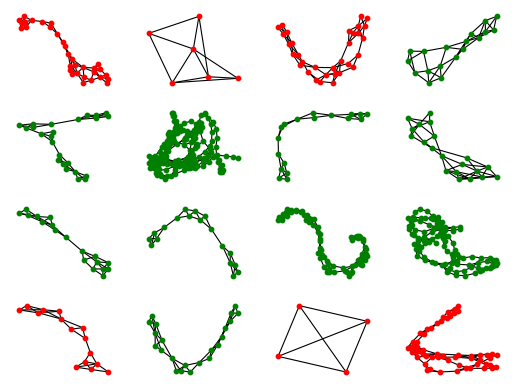

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

fig, ax = plt.subplots(4, 4)
for i, data in enumerate(dataset[-16:]):
    out = gin(data.x, data.edge_index, data.batch)
    color = 'green' if out.argmax(dim=1) == data.y else 'red'

    ix = np.unravel_index(i, ax.shape)
    ax[ix].axis('off')
    G = to_networkx(dataset[i], to_undirected=True)
    nx.draw_networkx(G,
                     pos = nx.spring_layout(G, seed=0),
                     with_labels = False,
                     node_size = 10,
                     node_color = color,
                     width = 0.8,
                     ax = ax[ix]
                     )

In [ ]:
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool

class GCN(torch.nn.Module):
    def __init__(self, dim_h):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, dim_h)
        self.conv2 = GCNConv(dim_h, dim_h)
        self.conv3 = GCNConv(dim_h, dim_h)
        self.lin = Linear(dim_h, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()
        h = self.conv3(h, edge_index)

        hG = global_mean_pool(h, batch)

        h = F.dropout(hG, p=0.5, training=self.training)
        h = self.lin(h)

        return F.log_softmax(h, dim=1)

gcn = GCN(dim_h=32)
gcn = train(gcn, train_loader)
test_loss, test_acc = test(gcn, test_loader)
print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

Epoch   0 | Train Loss: 0.68 | Train Acc: 57.90% | Val Loss: 0.66 | Val Acc: 66.57%
Epoch  20 | Train Loss: 0.61 | Train Acc: 70.08% | Val Loss: 0.61 | Val Acc: 74.45%
Epoch  40 | Train Loss: 0.60 | Train Acc: 69.90% | Val Loss: 0.59 | Val Acc: 76.36%
Epoch  60 | Train Loss: 0.60 | Train Acc: 70.90% | Val Loss: 0.59 | Val Acc: 75.80%
Epoch  80 | Train Loss: 0.60 | Train Acc: 71.16% | Val Loss: 0.60 | Val Acc: 75.52%
Epoch 100 | Train Loss: 0.60 | Train Acc: 68.64% | Val Loss: 0.60 | Val Acc: 71.26%
Test Loss: 0.61 | Test Acc: 72.14%


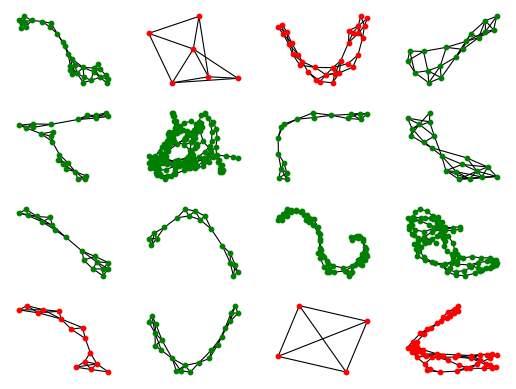

In [ ]:
fig, ax = plt.subplots(4, 4)
for i, data in enumerate(dataset[-16:]):
    out = gcn(data.x, data.edge_index, data.batch)
    color = 'green' if out.argmax(dim=1) == data.y else 'red'

    ix = np.unravel_index(i, ax.shape)
    ax[ix].axis('off')
    G = to_networkx(dataset[i], to_undirected=True)
    nx.draw_networkx(G,
                     pos = nx.spring_layout(G, seed=0),
                     with_labels = False,
                     node_size = 10,
                     node_color = color,
                     width = 0.8,
                     ax = ax[ix]
                     )

In [ ]:
gcn.eval()
gin.eval()
acc_gcn, acc_gin, acc_ens = 0, 0, 0

for data in test_loader:
    out_gcn = gcn(data.x, data.edge_index, data.batch)
    out_gin = gin(data.x, data.edge_index, data.batch)
    out_ens = (out_gcn + out_gin) / 2

    acc_gcn += accuracy(out_gcn.argmax(dim=1), data.y) / len(test_loader)
    acc_gin += accuracy(out_gin.argmax(dim=1), data.y) / len(test_loader)
    acc_ens += accuracy(out_ens.argmax(dim=1), data.y) / len(test_loader)

print(f'GCN accuracy:         {acc_gcn*100:.2f}%')
print(f'GIN accuracy:         {acc_gin*100:.2f}%')
print(f'GCN + GIN accuracy:   {acc_ens*100:.2f}%')

GCN accuracy:         73.70%
GIN accuracy:         74.74%
GCN + GIN accuracy:   77.08%


# Chapter 10. GAE / VGAE / SEAL

In [ ]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
np.random.seed(0)
import torch
torch.manual_seed(0)
import matplotlib.pyplot as plt
import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = T.Compose([
    T.NormalizeFeatures(),
    T.ToDevice(device),
    T.RandomLinkSplit(num_val=0.05, num_test=0.1, is_undirected=True, split_labels=True, add_negative_train_samples=False),
])

dataset = Planetoid('.', name='Cora', transform=transform)

train_data, val_data, test_data = dataset[0]

Processing...
Done!


In [ ]:
from torch_geometric.nn import GCNConv, VGAE

class Encoder(torch.nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.conv1 = GCNConv(dim_in, 2 * dim_out)
        self.conv_mu = GCNConv(2 * dim_out, dim_out)
        self.conv_logstd = GCNConv(2 * dim_out, dim_out)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv_mu(x, edge_index), self.conv_logstd(x, edge_index)

model = VGAE(Encoder(dataset.num_features, 16)).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train():
    model.train()
    optimizer.zero_grad()
    z = model.encode(train_data.x, train_data.edge_index)
    loss = model.recon_loss(z, train_data.pos_edge_label_index) + (1 / train_data.num_nodes) * model.kl_loss()
    loss.backward()
    optimizer.step()
    return float(loss)

@torch.no_grad()
def test(data):
    model.eval()
    z = model.encode(data.x, data.edge_index)
    return model.test(z, data.pos_edge_label_index, data.neg_edge_label_index)

for epoch in range(301):
    loss = train()
    val_auc, val_ap = test(val_data)
    if epoch % 50 == 0:
        print(f'Epoch {epoch:>2} | Loss: {loss: 4f} | Val AUC: {val_auc:.4f} | Val AP: {val_ap:.4f}')

test_auc, test_ap = test(test_data)
print(f'Test AUC: {test_auc:.4f} | Test AP {test_ap:.4f}')

z = model.encode(test_data.x, test_data.edge_index)
Ahat = torch.sigmoid(z @ z.T)
print()
Ahat

Epoch  0 | Loss:  3.547185 | Val AUC: 0.6809 | Val AP: 0.7078
Epoch 50 | Loss:  1.334754 | Val AUC: 0.6735 | Val AP: 0.6954
Epoch 100 | Loss:  1.137459 | Val AUC: 0.7724 | Val AP: 0.7751
Epoch 150 | Loss:  1.087624 | Val AUC: 0.7976 | Val AP: 0.7994
Epoch 200 | Loss:  1.016565 | Val AUC: 0.8393 | Val AP: 0.8263
Epoch 250 | Loss:  0.995964 | Val AUC: 0.8412 | Val AP: 0.8298
Epoch 300 | Loss:  0.983719 | Val AUC: 0.8513 | Val AP: 0.8388
Test AUC: 0.8399 | Test AP 0.8435



tensor([[0.7744, 0.6893, 0.7944,  ..., 0.5784, 0.8221, 0.8066],
        [0.6893, 0.6473, 0.7263,  ..., 0.5790, 0.7409, 0.7319],
        [0.7944, 0.7263, 0.8320,  ..., 0.6172, 0.8521, 0.8398],
        ...,
        [0.5784, 0.5790, 0.6172,  ..., 0.6172, 0.6253, 0.6098],
        [0.8221, 0.7409, 0.8521,  ..., 0.6253, 0.8758, 0.8610],
        [0.8066, 0.7319, 0.8398,  ..., 0.6098, 0.8610, 0.8498]],
       grad_fn=<SigmoidBackward0>)

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, average_precision_score
from scipy.sparse.csgraph import shortest_path

import torch.nn.functional as F
from torch.nn import Conv1d, MaxPool1d, Linear, Dropout, BCEWithLogitsLoss

from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import RandomLinkSplit
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, aggr
from torch_geometric.utils import k_hop_subgraph, to_scipy_sparse_matrix

transform = RandomLinkSplit(num_val=0.05, num_test=0.1, is_undirected=True, split_labels=True)
dataset = Planetoid('.', name='Cora', transform=transform)
train_data, val_data, test_data = dataset[0]
train_data

Data(x=[2708, 1433], edge_index=[2, 8976], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], pos_edge_label=[4488], pos_edge_label_index=[2, 4488], neg_edge_label=[4488], neg_edge_label_index=[2, 4488])

In [ ]:
def seal_processing(dataset, edge_label_index, y):
    data_list = []

    for src, dst in edge_label_index.t().tolist():
        sub_nodes, sub_edge_index, mapping, _ = k_hop_subgraph([src, dst], 2, dataset.edge_index, relabel_nodes=True)
        src, dst = mapping.tolist()

        mask1 = (sub_edge_index[0] != src) | (sub_edge_index[1] != dst)
        mask2 = (sub_edge_index[0] != dst) | (sub_edge_index[1] != src)
        sub_edge_index = sub_edge_index[:, mask1 & mask2]

        src, dst = (dst, src) if src > dst else (src, dst)
        adj = to_scipy_sparse_matrix(sub_edge_index, num_nodes=sub_nodes.size(0)).tocsr()

        idx = list(range(src)) + list(range(src + 1, adj.shape[0]))
        adj_wo_src = adj[idx, :][:, idx]

        idx = list(range(dst)) + list(range(dst + 1, adj.shape[0]))
        adj_wo_dst = adj[idx, :][:, idx]

        d_src = shortest_path(adj_wo_dst, directed=False, unweighted=True, indices=src)
        d_src = np.insert(d_src, dst, 0, axis=0)
        d_src = torch.from_numpy(d_src)
        d_dst = shortest_path(adj_wo_src, directed=False, unweighted=True, indices=dst-1)
        d_dst = np.insert(d_dst, src, 0, axis=0)
        d_dst = torch.from_numpy(d_dst)

        dist = d_src + d_dst
        z = 1 + torch.min(d_src, d_dst) + dist // 2 * (dist // 2 + dist % 2 - 1)
        z[src], z[dst], z[torch.isnan(z)] = 1., 1., 0.
        z = z.to(torch.long)

        node_labels = F.one_hot(z, num_classes=200)
        node_emb = dataset.x[sub_nodes]
        node_x = torch.cat([node_emb, node_labels], dim=1)

        data = Data(x=node_x, z=z, edge_index=sub_edge_index, y=y)
        data_list.append(data)

    return data_list

train_pos_data_list = seal_processing(train_data, train_data.pos_edge_label_index, 1)
train_neg_data_list = seal_processing(train_data, train_data.neg_edge_label_index, 0)

val_pos_data_list = seal_processing(val_data, val_data.pos_edge_label_index, 1)
val_neg_data_list = seal_processing(val_data, val_data.neg_edge_label_index, 0)

test_pos_data_list = seal_processing(test_data, test_data.pos_edge_label_index, 1)
test_neg_data_list = seal_processing(test_data, test_data.neg_edge_label_index, 0)

train_dataset = train_pos_data_list + train_neg_data_list
val_dataset = val_pos_data_list + val_neg_data_list
test_dataset = test_pos_data_list + test_neg_data_list

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [ ]:
class DGCNN(torch.nn.Module):
    def __init__(self, dim_in, k=30):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, 32)
        self.gcn2 = GCNConv(32, 32)
        self.gcn3 = GCNConv(32, 32)
        self.gcn4 = GCNConv(32, 1)

        self.global_pool = aggr.SortAggregation(k=k)

        self.conv1 = Conv1d(1, 16, 97, 97)
        self.conv2 = Conv1d(16, 32, 5, 1)
        self.maxpool = MaxPool1d(2, 2)

        self.linear1 = Linear(352, 128)
        self.dropout = Dropout(0.5)
        self.linear2 = Linear(128, 1)

    def forward(self, x, edge_index, batch):
        h1 = self.gcn1(x, edge_index).tanh()
        h2 = self.gcn2(h1, edge_index).tanh()
        h3 = self.gcn3(h2, edge_index).tanh()
        h4 = self.gcn4(h3, edge_index).tanh()
        h = torch.cat([h1, h2, h3, h4], dim=-1)

        h = self.global_pool(h, batch)
        h = h.view(h.size(0), 1, h.size(-1))
        h = self.conv1(h).relu()
        h = self.maxpool(h)
        h = self.conv2(h).relu()
        h = h.view(h.size(0), -1)
        h = self.linear1(h).relu()
        h = self.dropout(h)
        h = self.linear2(h).sigmoid()
        return h

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DGCNN(train_dataset[0].num_features).to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)
criterion = BCEWithLogitsLoss()

def train():
    model.train()
    total_loss = 0

    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)
        loss = criterion(out.view(-1), data.y.to(torch.float))
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * data.num_graphs

    return total_loss / len(train_dataset)

@torch.no_grad()
def test(loader):
    model.eval()
    y_pred, y_true = [], []

    for data in loader:
        data = data.to(device)
        out = model(data.x, data.edge_index, data.batch)
        y_pred.append(out.view(-1).cpu())
        y_true.append(data.y.view(-1).cpu().to(torch.float))

    auc = roc_auc_score(torch.cat(y_true), torch.cat(y_pred))
    ap = average_precision_score(torch.cat(y_true), torch.cat(y_pred))

    return auc, ap

for epoch in range(31):
    loss = train()
    val_auc, val_ap = test(val_loader)
    print(f'Epoch {epoch:>2} | Loss: {loss:.4f} | Val AUC: {val_auc:.4f} | Val AP: {val_ap:.4f}')

test_auc, test_ap = test(test_loader)
print(f'Test AUC: {test_auc:.4f} | Test AP {test_ap:.4f}')

Epoch  0 | Loss: 0.7004 | Val AUC: 0.7401 | Val AP: 0.7578
Epoch  1 | Loss: 0.6403 | Val AUC: 0.7788 | Val AP: 0.7980
Epoch  2 | Loss: 0.6121 | Val AUC: 0.7888 | Val AP: 0.8091
Epoch  3 | Loss: 0.6074 | Val AUC: 0.7968 | Val AP: 0.8193
Epoch  4 | Loss: 0.6040 | Val AUC: 0.7964 | Val AP: 0.8184
Epoch  5 | Loss: 0.6021 | Val AUC: 0.7981 | Val AP: 0.8240
Epoch  6 | Loss: 0.6010 | Val AUC: 0.7965 | Val AP: 0.8193
Epoch  7 | Loss: 0.5989 | Val AUC: 0.8002 | Val AP: 0.8237
Epoch  8 | Loss: 0.5983 | Val AUC: 0.7976 | Val AP: 0.8176
Epoch  9 | Loss: 0.5975 | Val AUC: 0.7972 | Val AP: 0.8138
Epoch 10 | Loss: 0.5960 | Val AUC: 0.8027 | Val AP: 0.8322
Epoch 11 | Loss: 0.5963 | Val AUC: 0.7965 | Val AP: 0.8138
Epoch 12 | Loss: 0.5959 | Val AUC: 0.8017 | Val AP: 0.8233
Epoch 13 | Loss: 0.5942 | Val AUC: 0.7954 | Val AP: 0.8052
Epoch 14 | Loss: 0.5933 | Val AUC: 0.7954 | Val AP: 0.8081
Epoch 15 | Loss: 0.5932 | Val AUC: 0.7962 | Val AP: 0.8066
Epoch 16 | Loss: 0.5932 | Val AUC: 0.7988 | Val AP: 0.81

# Chapter 11. GVAE / MolGAN

In [ ]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q deepchem==2.7.1

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 31.0 MB/s eta 0:00:00


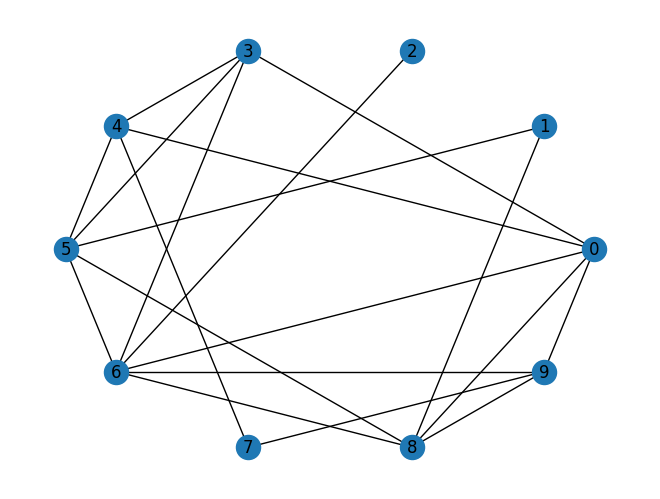

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.erdos_renyi_graph(10, 0.5, seed=0)

pos = nx.circular_layout(G)

nx.draw(G, pos=pos, with_labels=True)

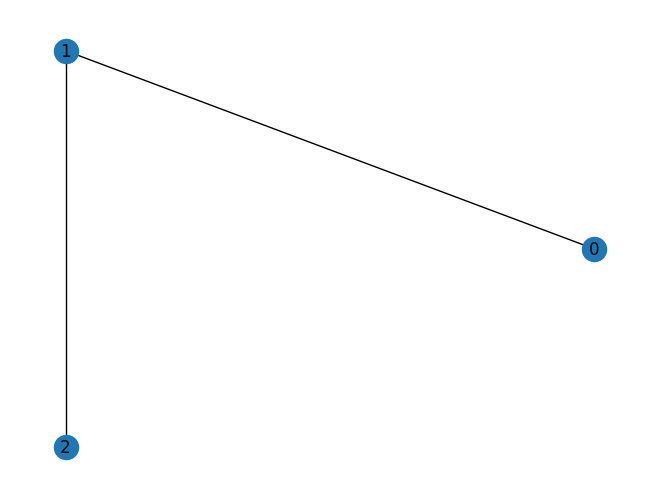

In [ ]:
G = nx.gnm_random_graph(3, 2, seed=0)
pos = nx.circular_layout(G)
nx.draw(G, pos=pos, with_labels=True)

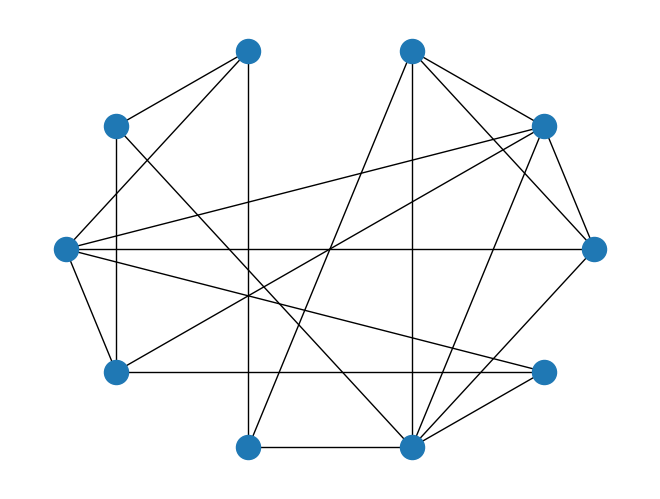

In [ ]:
G = nx.watts_strogatz_graph(10, 4, 0.5, seed=0)
pos = nx.circular_layout(G)
nx.draw(G, pos=pos)

In [ ]:
import torch
import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = T.Compose([
    T.NormalizeFeatures(),
    T.ToDevice(device),
    T.RandomLinkSplit(num_val=0.05, num_test=0.1, is_undirected=True, split_labels=True, add_negative_train_samples=False),
])

dataset = Planetoid('.', name='Cora', transform=transform)

train_data, val_data, test_data = dataset[0]

Processing...
Done!


In [ ]:
from torch_geometric.nn import GCNConv, VGAE

class Encoder(torch.nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.conv1 = GCNConv(dim_in, 2 * dim_out)
        self.conv_mu = GCNConv(2 * dim_out, dim_out)
        self.conv_logstd = GCNConv(2 * dim_out, dim_out)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv_mu(x, edge_index), self.conv_logstd(x, edge_index)

model = VGAE(Encoder(dataset.num_features, 16)).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train():
    model.train()
    optimizer.zero_grad()
    z = model.encode(train_data.x, train_data.edge_index)
    loss = model.recon_loss(z, train_data.pos_edge_label_index) + (1 / train_data.num_nodes) * model.kl_loss()
    loss.backward()
    optimizer.step()
    return float(loss)

@torch.no_grad()
def test(data):
    model.eval()
    z = model.encode(data.x, data.edge_index)
    return model.test(z, data.pos_edge_label_index, data.neg_edge_label_index)

for epoch in range(301):
    loss = train()
    val_auc, val_ap = test(val_data)
    if epoch % 50 == 0:
        print(f'Epoch: {epoch:>3} | Val AUC: {val_auc:.4f} | Val AP: {val_ap:.4f}')

val_auc, val_ap = test(val_data)
print(f'\nTest AUC: {val_auc:.4f} | Test AP: {val_ap:.4f}')

Epoch:   0 | Val AUC: 0.6412 | Val AP: 0.6833
Epoch:  50 | Val AUC: 0.6598 | Val AP: 0.6786
Epoch: 100 | Val AUC: 0.7432 | Val AP: 0.7516
Epoch: 150 | Val AUC: 0.7559 | Val AP: 0.7584
Epoch: 200 | Val AUC: 0.8072 | Val AP: 0.8116
Epoch: 250 | Val AUC: 0.8309 | Val AP: 0.8364
Epoch: 300 | Val AUC: 0.8604 | Val AP: 0.8606

Test AUC: 0.8604 | Test AP: 0.8606


In [ ]:
z = model.encode(test_data.x, test_data.edge_index)
adj = torch.where((z @ z.T) > 0.9, 1, 0)
adj

tensor([[1, 0, 1,  ..., 0, 1, 1],
        [0, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 1, 1],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 1,  ..., 0, 1, 1],
        [1, 0, 1,  ..., 0, 1, 1]])

In [ ]:
!pip install deepchem==2.7.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [ ]:
import pandas as pd
import numpy as np

import deepchem as dc
from deepchem.models.optimizers import ExponentialDecay
from deepchem.models import BasicMolGANModel as MolGAN
from deepchem.feat.molecule_featurizers.molgan_featurizer import GraphMatrix

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdmolfiles
from rdkit.Chem import rdmolops
from rdkit.Chem.Draw import IPythonConsole

In [ ]:
_, datasets, _ = dc.molnet.load_tox21()
df = pd.DataFrame(datasets[0].ids, columns=['smiles'])
df

[14:37:37] WARNING: not removing hydrogen atom without neighbors
[14:37:48] WARNING: not removing hydrogen atom without neighbors


smiles
0                             CC(O)(P(=O)(O)O)P(=O)(O)O
1                  CC(C)(C)OOC(C)(C)CCC(C)(C)OOC(C)(C)C
2                         OC[C@H](O)[C@@H](O)[C@H](O)CO
3              CCCCCCCC(=O)[O-].CCCCCCCC(=O)[O-].[Zn+2]
4                                     CC(C)COC(=O)C(C)C
...                                                 ...
6259              CC1CCCCN1CCCOC(=O)c1ccc(OC2CCCCC2)cc1
6260     Cc1cc(CCCOc2c(C)cc(-c3noc(C(F)(F)F)n3)cc2C)on1
6261  O=C1OC(OC(=O)c2cccnc2Nc2cccc(C(F)(F)F)c2)c2ccc...
6262                    CC(=O)C1(C)CC2=C(CCCC2(C)C)CC1C
6263  CC(C)CCC[C@@H](C)[C@H]1CC(=O)C2=C3CC[C@H]4C[C@...

[6264 rows x 1 columns]

In [ ]:
max_atom = 15
molecules = [x for x in df['smiles'].values if Chem.MolFromSmiles(x).GetNumAtoms() < max_atom]

featurizer = dc.feat.MolGanFeaturizer(max_atom_count=max_atom)

features = []
for x in molecules:
    mol = Chem.MolFromSmiles(x)
    new_order = rdmolfiles.CanonicalRankAtoms(mol)
    mol = rdmolops.RenumberAtoms(mol, new_order)
    feature = featurizer.featurize(mol)
    if feature.size != 0:
        features.append(feature[0])

features = [x for x in features if type(x) is GraphMatrix]

[14:37:57] WARNING: not removing hydrogen atom without neighbors
[14:37:58] WARNING: not removing hydrogen atom without neighbors


In [ ]:
!pip install tensorflow==2.8.0

from tensorflow import one_hot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 26.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-oauthlib
    Found existing insta

In [ ]:
gan = MolGAN(learning_rate=ExponentialDecay(0.001, 0.9, 5000), vertices=max_atom)

dataset = dc.data.NumpyDataset(X=[x.adjacency_matrix for x in features], y=[x.node_features for x in features])

def iterbatches(epochs):
    for i in range(epochs):
        for batch in dataset.iterbatches(batch_size=gan.batch_size, pad_batches=True):
            adjacency_tensor = one_hot(batch[0], gan.edges)
            node_tensor = one_hot(batch[1], gan.nodes)
            yield {gan.data_inputs[0]: adjacency_tensor, gan.data_inputs[1]: node_tensor}

gan.fit_gan(iterbatches(25), generator_steps=0.2, checkpoint_interval=5000)

generated_data = gan.predict_gan_generator(1000)
generated_mols = featurizer.defeaturize(generated_data)

valid_mols = [x for x in generated_mols if x is not None]
print (f'{len(valid_mols)} vaild molecules (out of {len((generated_mols))} generated molecules)')

generated_smiles = [Chem.MolToSmiles(x) for x in valid_mols]
generated_smiles_viz = [Chem.MolFromSmiles(x) for x in set(generated_smiles)]
print(f'{len(generated_smiles_viz)} unique valid molecules ({len(generated_smiles)-len(generated_smiles_viz)} redundant molecules)')

Draw.MolsToGridImage(generated_smiles_viz, molsPerRow=5, subImgSize=(200, 200), returnPNG=False)

# Chapter 12. MPNN / HAN

In [ ]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
np.random.seed(0)

import torch
torch.manual_seed(0)
from torch.nn import Linear
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree

class GCNConv(MessagePassing):
    def __init__(self, dim_in, dim_h):
        super().__init__(aggr='add')
        self.linear = Linear(dim_in, dim_h, bias=False)

    def forward(self, x, edge_index):
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        x = self.linear(x)

        row, col = edge_index
        deg = degree(col, x.size(0), dtype=x.dtype)
        deg_inv_sqrt = deg.pow(-0.5)
        deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        out = self.propagate(edge_index, x=x, norm=norm)
        return out

    def message(self, x, norm):
        return norm.view(-1, 1) * x

conv = GCNConv(16, 32)

In [ ]:
from torch_geometric.data import HeteroData
data = HeteroData()

data['user'].x = torch.Tensor([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]])

data['game'].x = torch.Tensor([[1, 1], [2, 2]])
data['dev'].x = torch.Tensor([[1], [2]])

data['user', 'follows', 'user'].edge_index = torch.Tensor([[0, 1], [1, 2]])
data['user', 'plays', 'game'].edge_index = torch.Tensor([[0, 1, 1, 2], [0, 0, 1, 1]])
data['dev', 'develops', 'game'].edge_index = torch.Tensor([[0, 1], [0, 1]])

data['user', 'plays', 'game'].edge_attr = torch.Tensor([[2], [0.5], [10], [12]])
data

HeteroData(
  user={ x=[3, 4] },
  game={ x=[2, 2] },
  dev={ x=[2, 1] },
  (user, follows, user)={ edge_index=[2, 2] },
  (user, plays, game)={
    edge_index=[2, 4],
    edge_attr=[4, 1]
  },
  (dev, develops, game)={ edge_index=[2, 2] }
)

In [ ]:
from torch import nn
import torch.nn.functional as F

import torch_geometric.transforms as T
from torch_geometric.datasets import DBLP
from torch_geometric.nn import GAT

metapaths = [[('author', 'paper'), ('paper', 'author')]]

transform = T.AddMetaPaths(metapaths=metapaths, drop_orig_edge_types=True)

dataset = DBLP('.', transform=transform)
data = dataset[0]
print(data)

HeteroData(
  metapath_dict={ (author, metapath_0, author)=[2] },
  author={
    x=[4057, 334],
    y=[4057],
    train_mask=[4057],
    val_mask=[4057],
    test_mask=[4057]
  },
  paper={ x=[14328, 4231] },
  term={ x=[7723, 50] },
  conference={ num_nodes=20 },
  (author, metapath_0, author)={ edge_index=[2, 11113] }
)


/usr/local/lib/python3.10/dist-packages/torch_sparse/matmul.py:97: UserWarning: Sparse CSR tensor support is in beta state. If you miss a functionality in the sparse tensor support, please submit a feature request to https://github.com/pytorch/pytorch/issues. (Triggered internally at ../aten/src/ATen/SparseCsrTensorImpl.cpp:54.)
  C = torch.sparse.mm(A, B)


In [ ]:
model = GAT(in_channels=-1, hidden_channels=64, out_channels=4, num_layers=1)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data, model = data.to(device), model.to(device)

@torch.no_grad()
def test(mask):
    pred = model(data.x_dict['author'], data.edge_index_dict[('author', 'metapath_0', 'author')]).argmax(dim=-1)
    acc = (pred[mask] == data['author'].y[mask]).sum() / mask.sum()
    return float(acc)

for epoch in range(101):
    model.train()
    optimizer.zero_grad()
    out = model(data.x_dict['author'], data.edge_index_dict[('author', 'metapath_0', 'author')])
    mask = data['author'].train_mask
    loss = F.cross_entropy(out[mask], data['author'].y[mask])
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        train_acc = test(data['author'].train_mask)
        val_acc = test(data['author'].val_mask)
        print(f'Epoch: {epoch:>3} | Train Loss: {loss:.4f} | Train Acc: {train_acc*100:.2f}% | Val Acc: {val_acc*100:.2f}%')

test_acc = test(data['author'].test_mask)
print(f'Test accuracy: {test_acc*100:.2f}%')

Epoch:   0 | Train Loss: 1.4351 | Train Acc: 25.25% | Val Acc: 22.00%
Epoch:  20 | Train Loss: 1.2815 | Train Acc: 46.50% | Val Acc: 37.50%
Epoch:  40 | Train Loss: 1.1641 | Train Acc: 63.75% | Val Acc: 53.25%
Epoch:  60 | Train Loss: 1.0628 | Train Acc: 76.50% | Val Acc: 63.25%
Epoch:  80 | Train Loss: 0.9771 | Train Acc: 81.00% | Val Acc: 66.25%
Epoch: 100 | Train Loss: 0.9040 | Train Acc: 83.50% | Val Acc: 67.75%
Test accuracy: 72.43%


In [ ]:
from torch_geometric.nn import GATConv, Linear, to_hetero

dataset = DBLP(root='.')
data = dataset[0]

data['conference'].x = torch.zeros(20, 1)

class GAT(torch.nn.Module):
    def __init__(self, dim_h, dim_out):
        super().__init__()
        self.conv = GATConv((-1, -1), dim_h, add_self_loops=False)
        self.linear = nn.Linear(dim_h, dim_out)

    def forward(self, x, edge_index):
        h = self.conv(x, edge_index).relu()
        h = self.linear(h)
        return h

model = GAT(dim_h=64, dim_out=4)
model = to_hetero(model, data.metadata(), aggr='sum')

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data, model = data.to(device), model.to(device)

@torch.no_grad()
def test(mask):
    model.eval()
    pred = model(data.x_dict, data.edge_index_dict)['author'].argmax(dim=-1)
    acc = (pred[mask] == data['author'].y[mask]).sum() / mask.sum()
    return float(acc)

for epoch in range(101):
    model.train()
    optimizer.zero_grad()
    out = model(data.x_dict, data.edge_index_dict)['author']
    mask = data['author'].train_mask
    loss = F.cross_entropy(out[mask], data['author'].y[mask])
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        train_acc = test(data['author'].train_mask)
        val_acc = test(data['author'].val_mask)
        print(f'Epoch: {epoch:>3} | Train Loss: {loss:.4f} | Train Acc: {train_acc*100:.2f}% | Val Acc: {val_acc*100:.2f}%')

test_acc = test(data['author'].test_mask)
print(f'Test accuracy: {test_acc*100:.2f}%')

Epoch:   0 | Train Loss: 1.3974 | Train Acc: 20.75% | Val Acc: 23.00%
Epoch:  20 | Train Loss: 1.2047 | Train Acc: 95.25% | Val Acc: 68.00%
Epoch:  40 | Train Loss: 0.8654 | Train Acc: 96.75% | Val Acc: 67.50%
Epoch:  60 | Train Loss: 0.5061 | Train Acc: 98.75% | Val Acc: 73.50%
Epoch:  80 | Train Loss: 0.2580 | Train Acc: 99.50% | Val Acc: 73.50%
Epoch: 100 | Train Loss: 0.1384 | Train Acc: 100.00% | Val Acc: 74.00%
Test accuracy: 78.63%


In [ ]:
import torch
import torch.nn.functional as F
from torch import nn

import torch_geometric.transforms as T
from torch_geometric.datasets import DBLP
from torch_geometric.nn import HANConv, Linear


dataset = DBLP('.')
data = dataset[0]
print(data)

data['conference'].x = torch.zeros(20, 1)

class HAN(nn.Module):
    def __init__(self, dim_in, dim_out, dim_h=128, heads=8):
        super().__init__()
        self.han = HANConv(dim_in, dim_h, heads=heads, dropout=0.6, metadata=data.metadata())
        self.linear = nn.Linear(dim_h, dim_out)

    def forward(self, x_dict, edge_index_dict):
        out = self.han(x_dict, edge_index_dict)
        out = self.linear(out['author'])
        return out

model = HAN(dim_in=-1, dim_out=4)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data, model = data.to(device), model.to(device)

@torch.no_grad()
def test(mask):
    model.eval()
    pred = model(data.x_dict, data.edge_index_dict).argmax(dim=-1)
    acc = (pred[mask] == data['author'].y[mask]).sum() / mask.sum()
    return float(acc)

for epoch in range(101):
    model.train()
    optimizer.zero_grad()
    out = model(data.x_dict, data.edge_index_dict)
    mask = data['author'].train_mask
    loss = F.cross_entropy(out[mask], data['author'].y[mask])
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        train_acc = test(data['author'].train_mask)
        val_acc = test(data['author'].val_mask)
        print(f'Epoch: {epoch:>3} | Train Loss: {loss:.4f} | Train Acc: {train_acc*100:.2f}% | Val Acc: {val_acc*100:.2f}%')

test_acc = test(data['author'].test_mask)
print(f'Test accuracy: {test_acc*100:.2f}%')

HeteroData(
  author={
    x=[4057, 334],
    y=[4057],
    train_mask=[4057],
    val_mask=[4057],
    test_mask=[4057]
  },
  paper={ x=[14328, 4231] },
  term={ x=[7723, 50] },
  conference={ num_nodes=20 },
  (author, to, paper)={ edge_index=[2, 19645] },
  (paper, to, author)={ edge_index=[2, 19645] },
  (paper, to, term)={ edge_index=[2, 85810] },
  (paper, to, conference)={ edge_index=[2, 14328] },
  (term, to, paper)={ edge_index=[2, 85810] },
  (conference, to, paper)={ edge_index=[2, 14328] }
)
Epoch:   0 | Train Loss: 1.3938 | Train Acc: 19.50% | Val Acc: 24.00%
Epoch:  20 | Train Loss: 1.1445 | Train Acc: 92.25% | Val Acc: 63.25%
Epoch:  40 | Train Loss: 0.7604 | Train Acc: 95.50% | Val Acc: 70.00%
Epoch:  60 | Train Loss: 0.4526 | Train Acc: 97.75% | Val Acc: 76.50%
Epoch:  80 | Train Loss: 0.3118 | Train Acc: 99.25% | Val Acc: 78.75%
Epoch: 100 | Train Loss: 0.2244 | Train Acc: 99.75% | Val Acc: 78.25%
Test accuracy: 81.61%


# Chapter 13. EvolveGCN / MPNN-LSTM

In [ ]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q torch-geometric-temporal

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

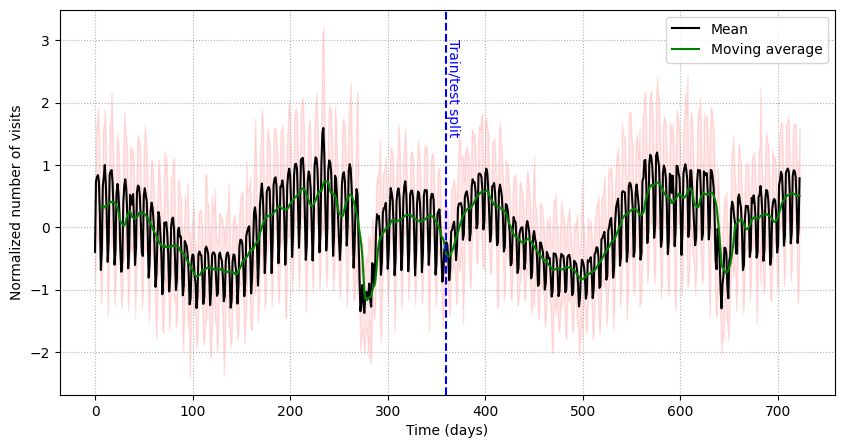

In [ ]:
from torch_geometric_temporal.signal import temporal_signal_split
from torch_geometric_temporal.dataset import WikiMathsDatasetLoader
from torch_geometric_temporal.nn.recurrent import EvolveGCNH

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

dataset = WikiMathsDatasetLoader().get_dataset()
train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.5)

mean_cases = [snapshot.y.mean().item() for snapshot in dataset]
std_cases = [snapshot.y.std().item() for snapshot in dataset]
df = pd.DataFrame(mean_cases, columns=['mean'])
df['std'] = pd.DataFrame(std_cases, columns=['std'])
df['rolling'] = df['mean'].rolling(7).mean()

plt.figure(figsize=(10,5))
plt.plot(df['mean'], 'k-', label='Mean')
plt.plot(df['rolling'], 'g-', label='Moving average')
plt.grid(linestyle=':')
plt.fill_between(df.index, df['mean']-df['std'], df['mean']+df['std'], color='r', alpha=0.1)
plt.axvline(x=360, color='b', linestyle='--')
plt.text(360, 1.5, 'Train/test split', rotation=-90, color='b')
plt.xlabel('Time (days)')
plt.ylabel('Normalized number of visits')
plt.legend(loc='upper right')

In [ ]:
class TemporalGNN(torch.nn.Module):
    def __init__(self, node_count, dim_in):
        super().__init__()
        self.recurrent = EvolveGCNH(node_count, dim_in)
        self.linear = torch.nn.Linear(dim_in, 1)

    def forward(self, x, edge_index, edge_weight):
        h = self.recurrent(x, edge_index, edge_weight).relu()
        h = self.linear(h)
        return h

model = TemporalGNN(dataset[0].x.shape[0], dataset[0].x.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.train()

model

TemporalGNN(
  (recurrent): EvolveGCNH(
    (pooling_layer): TopKPooling(8, ratio=0.00749063670411985, multiplier=1.0)
    (recurrent_layer): GRU(8, 8)
    (conv_layer): GCNConv_Fixed_W(8, 8)
  )
  (linear): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
for epoch in tqdm(range(50)):
    for i, snapshot in enumerate(train_dataset):
        y_pred = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
        loss = torch.mean((y_pred - snapshot.y) ** 2)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

model.eval()
loss = 0
for i, snapshot in enumerate(test_dataset):
    y_pred = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
    mse = torch.mean((y_pred - snapshot.y) ** 2)
    loss += mse
loss = loss / (i+1)
print(f'MSE = {loss.item():.4f}')

100%|██████████| 50/50 [06:38<00:00,  7.96s/it]


MSE = 0.7706


In [ ]:
from torch_geometric_temporal.nn.recurrent import EvolveGCNO

class TemporalGNN(torch.nn.Module):
    def __init__(self, dim_in):
        super().__init__()
        self.recurrent = EvolveGCNO(dim_in, 1)
        self.linear = torch.nn.Linear(dim_in, 1)

    def forward(self, x, edge_index, edge_weight):
        h = self.recurrent(x, edge_index, edge_weight).relu()
        h = self.linear(h)
        return h

model = TemporalGNN(dataset[0].x.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model.train()

for epoch in tqdm(range(50)):
    for i, snapshot in enumerate(train_dataset):
        y_pred = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
        loss = torch.mean((y_pred - snapshot.y) ** 2)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

model.eval()
loss = 0
for i, snapshot in enumerate(test_dataset):
    y_pred = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
    mse = torch.mean((y_pred - snapshot.y) ** 2)
    loss += mse
loss = loss / (i+1)
print(f'MSE = {loss.item():.4f}')

100%|██████████| 50/50 [07:34<00:00,  9.09s/it]


MSE = 0.7524


Text(0, 0.5, 'Mean normalized number of cases')

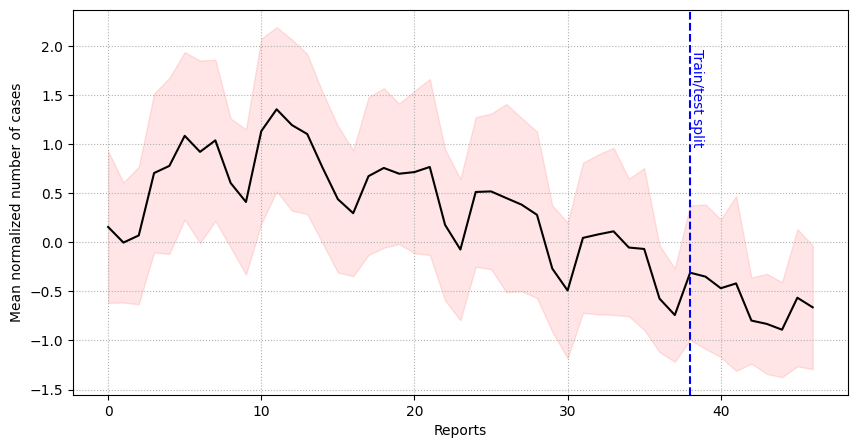

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from torch_geometric_temporal.dataset import EnglandCovidDatasetLoader
from torch_geometric_temporal.signal import temporal_signal_split

dataset = EnglandCovidDatasetLoader().get_dataset(lags=14)
train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.8)

mean_cases = [snapshot.y.mean().item() for snapshot in dataset]
std_cases = [snapshot.y.std().item() for snapshot in dataset]
df = pd.DataFrame(mean_cases, columns=['mean'])
df['std'] = pd.DataFrame(std_cases, columns=['std'])

plt.figure(figsize=(10,5))
plt.plot(df['mean'], 'k-')
plt.grid(linestyle=':')
plt.fill_between(df.index, df['mean']-df['std'], df['mean']+df['std'], color='r', alpha=0.1)
plt.axvline(x=38, color='b', linestyle='--', label='Train/test split')
plt.text(38, 1, 'Train/test split', rotation=-90, color='b')
plt.xlabel('Reports')
plt.ylabel('Mean normalized number of cases')

In [ ]:
from torch_geometric_temporal.nn.recurrent import MPNNLSTM

class TemporalGNN(torch.nn.Module):
    def __init__(self, dim_in, dim_h, num_nodes):
        super().__init__()
        self.recurrent = MPNNLSTM(dim_in, dim_h, num_nodes, 1, 0.5)
        self.dropout = torch.nn.Dropout(0.5)
        self.linear = torch.nn.Linear(2 * dim_h + dim_in, 1)

    def forward(self, x, edge_index, edge_weight):
        h = self.recurrent(x, edge_index, edge_weight).relu()
        h = self.dropout(h)
        h = self.linear(h).tanh()
        return h

model = TemporalGNN(dataset[0].x.shape[1], 64, dataset[0].x.shape[0])
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model.train()

for epoch in tqdm(range(100)):
    loss = 0
    for i, snapshot in enumerate(train_dataset):
        y_pred = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
        loss = loss + torch.mean((y_pred-snapshot.y)**2)
    loss = loss / (i+1)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

model.eval()
loss = 0
for i, snapshot in enumerate(test_dataset):
    y_pred = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
    mse = torch.mean((y_pred-snapshot.y)**2)
    loss += mse
loss = loss / (i+1)
print(f'MSE: {loss.item():.4f}')

TemporalGNN(
  (recurrent): MPNNLSTM(
    (_convolution_1): GCNConv(14, 64)
    (_convolution_2): GCNConv(64, 64)
    (_batch_norm_1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (_batch_norm_2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (_recurrent_1): LSTM(128, 64)
    (_recurrent_2): LSTM(64, 64)
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (linear): Linear(in_features=142, out_features=1, bias=True)
)


100%|██████████| 100/100 [00:38<00:00,  2.60it/s]

MSE: 1.4762


Text(0, 0.5, 'Mean normalized number of cases')

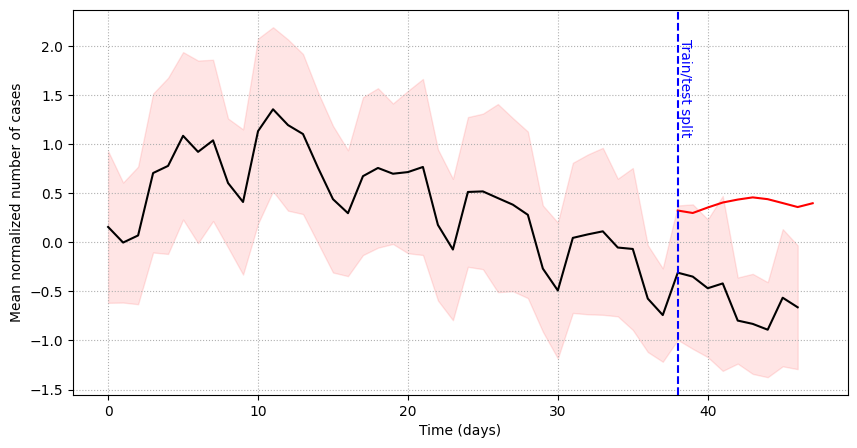

In [ ]:
y_preds = [model(snapshot.x, snapshot.edge_index, snapshot.edge_attr).squeeze().detach().numpy().mean() for snapshot in test_dataset]

plt.figure(figsize=(10,5))
plt.plot(df['mean'], 'k-')
plt.plot(range(38,48), y_preds, 'r-', label='Prediction')
plt.grid(linestyle=':')
plt.fill_between(df.index, df['mean']-df['std'], df['mean']+df['std'], color='r', alpha=0.1)
plt.axvline(x=38, color='b', linestyle='--', label='Train/test split')
plt.text(38, 1.1, 'Train/test split', rotation=-90, color='b')
plt.xlabel('Time (days)')
plt.ylabel('Mean normalized number of cases')

<Axes: >

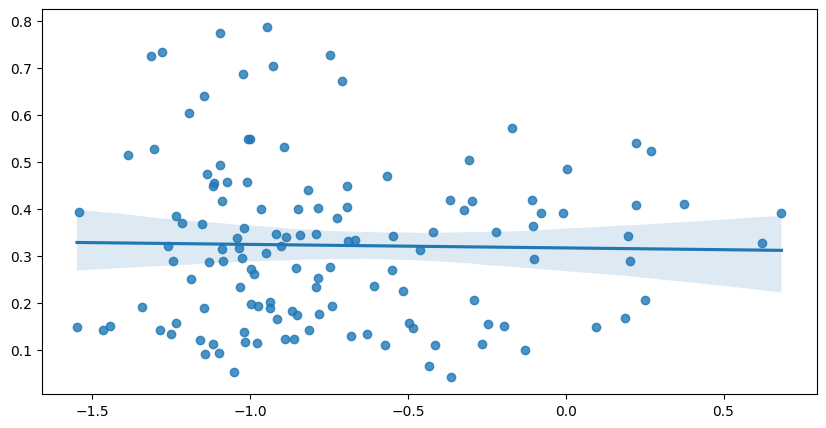

In [ ]:
import seaborn as sns

y_pred = model(test_dataset[0].x, test_dataset[0].edge_index, test_dataset[0].edge_attr).detach().squeeze().numpy()

plt.figure(figsize=(10,5))
sns.regplot(x=test_dataset[0].y.numpy(), y=y_pred)

# Chapter 14. GNNExplainer / Integrated Gradients

In [ ]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric~=2.0.4 -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q captum==0.6.0

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric~=2.0.4 -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q captum==0.6.0

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.6 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout

from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GINConv, global_add_pool, GNNExplainer

dataset = TUDataset(root='data/TUDataset', name='MUTAG').shuffle()

# Create training, validation, and test sets
train_dataset = dataset[:int(len(dataset)*0.8)]
val_dataset   = dataset[int(len(dataset)*0.8):int(len(dataset)*0.9)]
test_dataset  = dataset[int(len(dataset)*0.9):]

# Create mini-batches
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=True)

class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(dataset.num_node_features, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        h = torch.cat((h1, h2, h3), dim=1)

        h = self.lin1(h)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)

        return F.log_softmax(h, dim=1)

model = GIN(dim_h=32)

@torch.no_grad()
def test(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    for data in loader:
        out = model(data.x, data.edge_index, data.batch)
        loss += criterion(out, data.y) / len(loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(loader)

    return loss, acc

def accuracy(pred_y, y):
    return ((pred_y == y).sum() / len(y)).item()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 200

model.train()
for epoch in range(epochs+1):
    total_loss = 0
    acc = 0
    val_loss = 0
    val_acc = 0

    # Train on batches
    for data in train_loader:
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)
        loss = criterion(out, data.y)
        total_loss += loss / len(train_loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(train_loader)
        loss.backward()
        optimizer.step()

        # Validation
        val_loss, val_acc = test(model, val_loader)

    # Print metrics every 20 epochs
    if(epoch % 20 == 0):
        print(f'Epoch {epoch:>3} | Train Loss: {total_loss:.2f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

test_loss, test_acc = test(model, test_loader)
print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

Extracting data/TUDataset/MUTAG/MUTAG.zip
Processing...
Done!


Epoch   0 | Train Loss: 1.93 | Train Acc: 65.39% | Val Loss: 0.61 | Val Acc: 68.42%
Epoch  20 | Train Loss: 0.46 | Train Acc: 79.88% | Val Loss: 0.35 | Val Acc: 89.47%
Epoch  40 | Train Loss: 0.39 | Train Acc: 82.48% | Val Loss: 0.33 | Val Acc: 94.74%
Epoch  60 | Train Loss: 0.33 | Train Acc: 81.44% | Val Loss: 0.35 | Val Acc: 89.47%
Epoch  80 | Train Loss: 0.40 | Train Acc: 75.80% | Val Loss: 0.56 | Val Acc: 68.42%
Epoch 100 | Train Loss: 0.38 | Train Acc: 78.98% | Val Loss: 0.21 | Val Acc: 94.74%
Epoch 120 | Train Loss: 0.30 | Train Acc: 88.68% | Val Loss: 0.28 | Val Acc: 89.47%
Epoch 140 | Train Loss: 0.20 | Train Acc: 92.23% | Val Loss: 0.21 | Val Acc: 94.74%
Epoch 160 | Train Loss: 0.34 | Train Acc: 88.12% | Val Loss: 0.28 | Val Acc: 89.47%
Epoch 180 | Train Loss: 0.28 | Train Acc: 87.59% | Val Loss: 0.17 | Val Acc: 94.74%
Epoch 200 | Train Loss: 0.17 | Train Acc: 93.75% | Val Loss: 0.27 | Val Acc: 89.47%
Test Loss: 0.41 | Test Acc: 84.21%


In [ ]:
explainer = GNNExplainer(model, epochs=100, num_hops=1)

data = dataset[-1]
feature_mask, edge_mask = explainer.explain_graph(data.x, data.edge_index)

feature_mask

Explain graph: 100%|██████████| 100/100 [00:00<00:00, 119.19it/s]


tensor([0.7777, 0.6492, 0.6702, 0.2613, 0.2655, 0.2748, 0.2574])

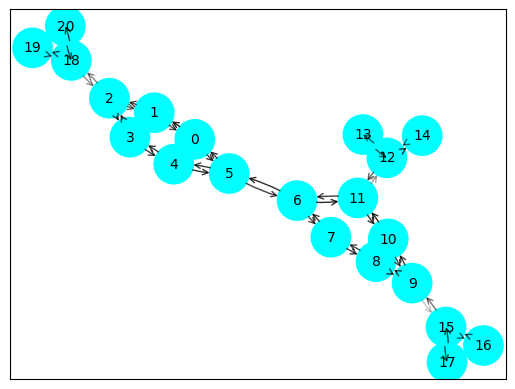

In [ ]:
ax, G = explainer.visualize_subgraph(-1, data.edge_index, edge_mask, y=data.y)
plt.show()

In [ ]:
import numpy as np
np.random.seed(0)
import tqdm
import matplotlib.pyplot as plt
import torch.nn.functional as F
from captum.attr import IntegratedGradients

import torch_geometric.transforms as T
from torch_geometric.datasets import Twitch
from torch_geometric.nn import Explainer, GCNConv, to_captum


dataset = Twitch('.', name="EN")
data = dataset[0]

class GCN(torch.nn.Module):
    def __init__(self, dim_h):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_features, dim_h)
        self.conv2 = GCNConv(dim_h, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index).relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.conv2(h, edge_index)
        return F.log_softmax(h, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(64).to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    log_logits = model(data.x, data.edge_index)
    loss = F.nll_loss(log_logits, data.y)
    loss.backward()
    optimizer.step()

def accuracy(pred_y, y):
    return ((pred_y == y).sum() / len(y)).item()

@torch.no_grad()
def test(model, data):
    model.eval()
    out = model(data.x, data.edge_index)
    acc = accuracy(out.argmax(dim=1), data.y)
    return acc

acc = test(model, data)
print(f'Accuracy: {acc*100:.2f}%')

Processing...
Done!


Accuracy: 68.83%


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


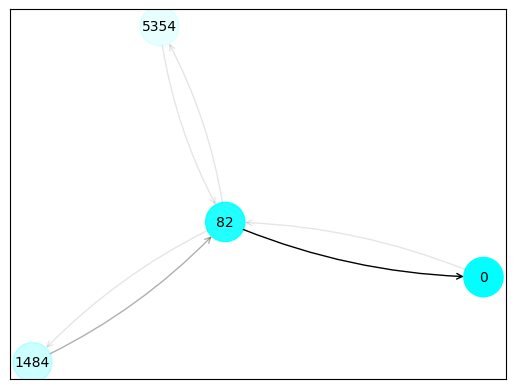

In [ ]:
node_idx = 0
captum_model = to_captum(model, mask_type='node_and_edge', output_idx=node_idx)

ig = IntegratedGradients(captum_model)

edge_mask = torch.ones(data.num_edges, requires_grad=True, device=device)

attr_node, attr_edge = ig.attribute(
    (data.x.unsqueeze(0), edge_mask.unsqueeze(0)),
    target=int(data.y[node_idx]),
    additional_forward_args=(data.edge_index),
    internal_batch_size=1
)

attr_node = attr_node.squeeze(0).abs().sum(dim=1)
attr_node /= attr_node.max()
attr_edge = attr_edge.squeeze(0).abs()
attr_edge /= attr_edge.max()

explainer = Explainer(model)
ax, G = explainer.visualize_subgraph(node_idx, data.edge_index, attr_edge, node_alpha=attr_node, y=data.y)
plt.show()

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


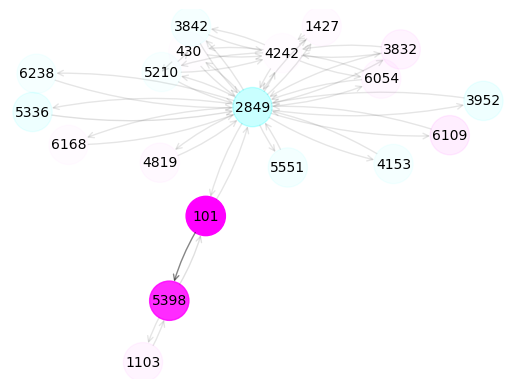

In [ ]:
node_idx = 101
captum_model = to_captum(model, mask_type='node_and_edge', output_idx=node_idx)
ig = IntegratedGradients(captum_model)
edge_mask = torch.ones(data.num_edges, requires_grad=True, device=device)

attr_node, attr_edge = ig.attribute(
    (data.x.unsqueeze(0), edge_mask.unsqueeze(0)),
    target=int(data.y[node_idx]),
    additional_forward_args=(data.edge_index),
    internal_batch_size=1)

attr_node = attr_node.squeeze(0).abs().sum(dim=1)
attr_node /= attr_node.max()
attr_edge = attr_edge.squeeze(0).abs()
attr_edge /= attr_edge.max()

fig = plt.figure()
explainer = Explainer(model)
ax, G = explainer.visualize_subgraph(node_idx, data.edge_index, attr_edge, node_alpha=attr_node, y=data.y)
ax.axis('off')
plt.show()

# Chapter 15. A3T-GCN

In [ ]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install -q torch-geometric-temporal==0.54.0

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 138.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 78.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.3.5 which is incompatible.


In [ ]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

url = 'https://github.com/VeritasYin/STGCN_IJCAI-18/raw/master/dataset/PeMSD7_Full.zip'
with urlopen(url) as zurl:
    with ZipFile(BytesIO(zurl.read())) as zfile:
        zfile.extractall('.')

In [ ]:
import pandas as pd
speeds = pd.read_csv('PeMSD7_V_228.csv', names=range(0, 228))
distances = pd.read_csv('PeMSD7_W_228.csv', names=range(0, 228))

Text(0, 0.5, 'Traffic speed')

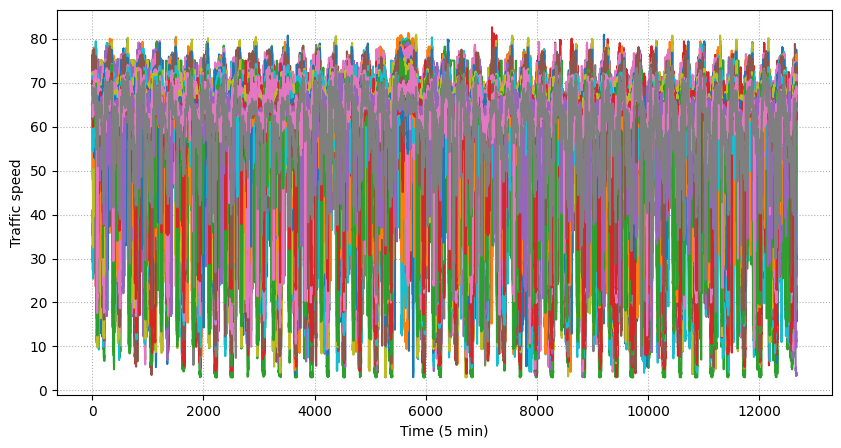

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(speeds)
plt.grid(linestyle=':')
plt.xlabel('Time (5 min)')
plt.ylabel('Traffic speed')

Text(0, 0.5, 'Traffic speed')

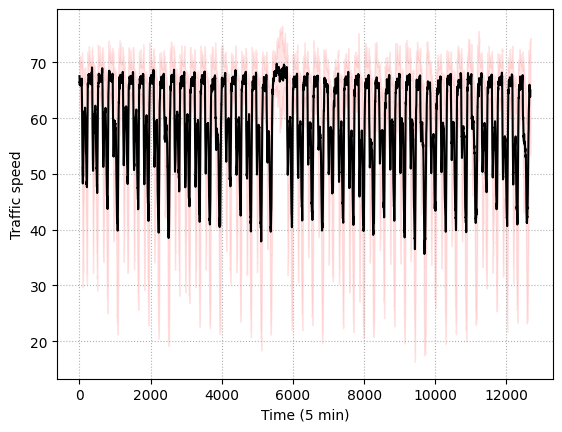

In [ ]:
mean = speeds.mean(axis=1)
std = speeds.std(axis=1)
plt.plot(mean, 'k-')

plt.fill_between(mean.index, mean-std, mean+std, color='r', alpha=0.1)
plt.grid(linestyle=':')
plt.xlabel('Time (5 min)')
plt.ylabel('Traffic speed')

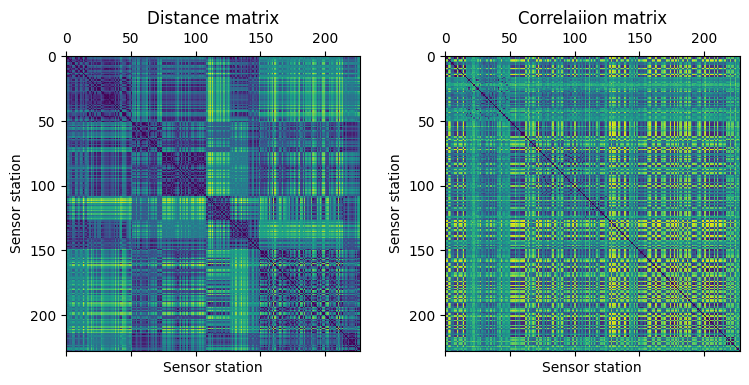

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
fig.tight_layout(pad=3.0)

ax1.matshow(distances)
ax1.set_xlabel('Sensor station')
ax1.set_ylabel('Sensor station')
ax1.title.set_text('Distance matrix')

ax2.matshow(-np.corrcoef(speeds.T))
ax2.set_xlabel('Sensor station')
ax2.set_ylabel('Sensor station')
ax2.title.set_text('Correlaiion matrix')

In [ ]:
def compute_adj(distances, sigma2=0.1, epsilon=0.5):
    d = distances.to_numpy() / 10000.
    d2 = d * d

    n = distances.shape[0]
    w_mask = np.ones([n, n]) - np.identity(n)
    return np.exp(-d2 / sigma2) * (np.exp(-d2 / sigma2) >= epsilon) * w_mask

In [ ]:
adj = compute_adj(distances)
adj[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.61266012, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Text(0, 0.5, 'Sensor station')

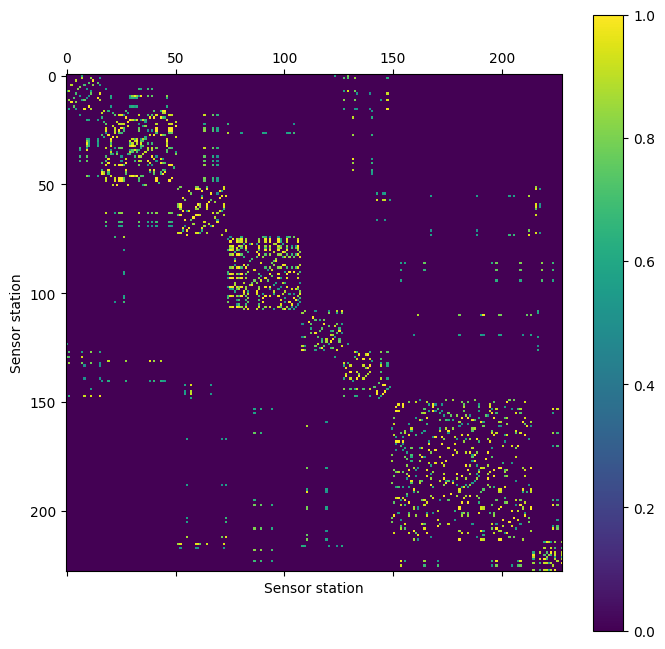

In [ ]:
plt.figure(figsize=(8, 8))
cax = plt.matshow(adj, False)
plt.colorbar(cax)
plt.xlabel('Sensor station')
plt.ylabel('Sensor station')

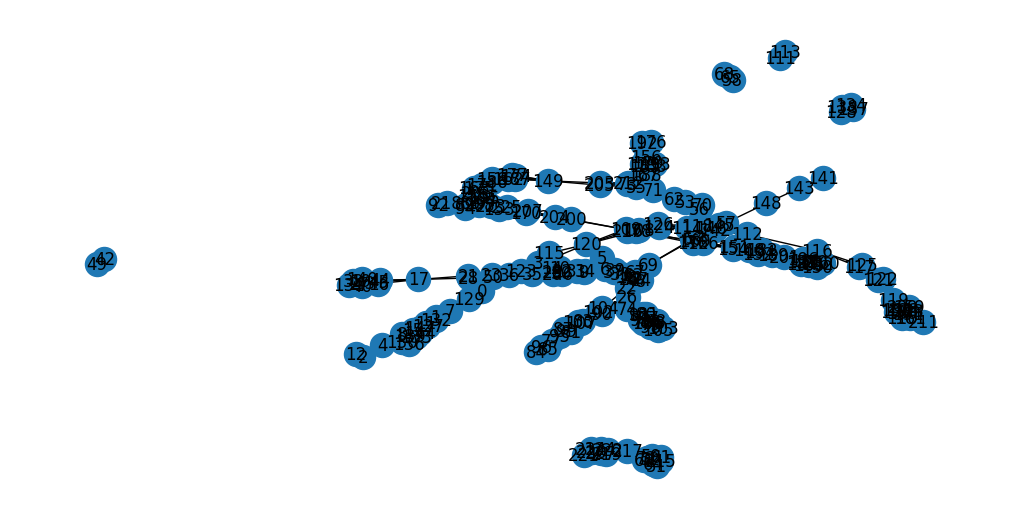

In [ ]:
import networkx as nx

def plot_graph(adj):
    plt.figure(figsize=(10, 5))
    rows, cols = np.where(adj > 0)
    edges = zip(rows.tolist(), cols.tolist())
    G = nx.Graph()
    G.add_edges_from(edges)
    nx.draw(G, with_labels=True)
    plt.show()

plot_graph(adj)

In [ ]:
def zscore(x, mean, std):
    return (x - mean) / std

speeds_norm = zscore(speeds, speeds.mean(axis=0), speeds.std(axis=0))

speeds_norm.head(1)

0         1         2         3         4         5         6    \
0  0.950754  0.548255  0.502211  0.831672  0.793696  1.193806  0.983384   

        7         8         9    ...       218       219       220      221  \
0  0.737268  0.933144 -0.718118  ...  0.542628  1.011204  0.609678  0.79198   

        222       223       224      225       226       227  
0  0.709507  0.734163  0.569479  1.04614  0.712316  1.046962  

[1 rows x 228 columns]

In [ ]:
lags = 24
horizon = 48
xs = []
ys = []

for i in range(lags, speeds_norm.shape[0] - horizon):
    xs.append(speeds_norm.to_numpy()[i-lags : i].T)
    ys.append(speeds_norm.to_numpy()[i+horizon-1])

In [ ]:
from torch_geometric_temporal.signal import StaticGraphTemporalSignal

edge_index = (np.array(adj) > 0).nonzero()
edge_weight = adj[adj > 0]
dataset = StaticGraphTemporalSignal(edge_index, adj[adj > 0], xs, ys)

dataset[0]

/usr/local/lib/python3.10/dist-packages/torch_geometric_temporal/signal/static_graph_temporal_signal.py:66: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.LongTensor(self.edge_index)


Data(x=[228, 24], edge_index=[2, 1664], edge_attr=[1664], y=[228])

In [ ]:
from torch_geometric_temporal.signal import temporal_signal_split

train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.8)

In [ ]:
import torch
from torch_geometric_temporal.nn.recurrent import A3TGCN

class TemporalGNN(torch.nn.Module):
    def __init__(self, dim_in, periods):
        super().__init__()
        self.tgnn = A3TGCN(in_channels=dim_in, out_channels=32, periods=periods)
        self.linear = torch.nn.Linear(32, periods)

    def forward(self, x, edge_index, edge_attr):
        h = self.tgnn(x, edge_index, edge_attr).relu()
        h = self.linear(h)
        return h

model = TemporalGNN(lags, 1).to('cpu')
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

model.train()
for epoch in range(30):
    loss = 0
    step = 0
    for i, snapshot in enumerate(train_dataset):
        y_pred = model(snapshot.x.unsqueeze(2), snapshot.edge_index, snapshot.edge_attr)
        loss += torch.mean((y_pred - snapshot.y) ** 2)
        step += 1
    loss = loss / (step + 1)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 10 == 0:
        print(f'Epoch {epoch+1:>2} | Train MSE: {loss:.4f}')

Epoch  1 | Train MSE: 1.0114
Epoch 11 | Train MSE: 0.9603
Epoch 21 | Train MSE: 0.9167


In [ ]:
def inverse_zscore(x, mean, std):
    return x * std + mean

y_test = []
for snapshot in test_dataset:
    y_hat = snapshot.y.numpy()
    y_hat = inverse_zscore(y_hat, speeds.mean(axis=0), speeds.std(axis=0))
    y_test = np.append(y_test, y_hat)

gnn_pred = []
model.eval()
for snapshot in test_dataset:
    y_hat = model(snapshot.x.unsqueeze(2), snapshot.edge_index, snapshot.edge_weight).squeeze().detach().numpy()
    y_hat = inverse_zscore(y_hat, speeds.mean(axis=0), speeds.std(axis=0))
    gnn_pred = np.append(gnn_pred, y_hat)

rw_pred = []
for snapshot in test_dataset:
    y_hat = snapshot.x[:, -1].squeeze().detach().numpy()
    y_hat = inverse_zscore(y_hat, speeds.mean(axis=0), speeds.std(axis=0))
    rw_pred = np.append(rw_pred, y_hat)

ha_pred = []
for i in range(lags, speeds_norm.shape[0] - horizon):
    y_hat = speeds_norm.to_numpy()[i-lags : i].T.mean(axis=1)
    y_hat = inverse_zscore(y_hat, speeds.mean(axis=0), speeds.std(axis=0))
    ha_pred.append(y_hat)
ha_pred = np.array(ha_pred).flatten()[-len(y_test):]

In [ ]:
def MAE(real, pred):
    return np.mean(np.abs(pred - real))

def RMSE(real, pred):
    return np.sqrt(np.mean((pred - real) ** 2))

def MAPE(real, pred):
    return np.mean(np.abs(pred - real) / (real + 1e-5))

print(f'GNN MAE  = {MAE(gnn_pred, y_test):.4f}')
print(f'GNN RMSE = {RMSE(gnn_pred, y_test):.4f}')
print(f'GNN MAPE = {MAPE(gnn_pred, y_test):.4f}')
print()
print(f'RW MAE  = {MAE(rw_pred, y_test):.4f}')
print(f'RW RMSE = {RMSE(rw_pred, y_test):.4f}')
print(f'RW MAPE = {MAPE(rw_pred, y_test):.4f}')
print()
print(f'HA MAE  = {MAE(ha_pred, y_test):.4f}')
print(f'HA RMSE = {RMSE(ha_pred, y_test):.4f}')
print(f'HA MAPE = {MAPE(ha_pred, y_test):.4f}')

GNN MAE  = 8.3551
GNN RMSE = 11.9278
GNN MAPE = 0.1505

RW MAE  = 11.0469
RW RMSE = 17.6501
RW MAPE = 0.2999

HA MAE  = 11.7308
HA RMSE = 17.9009
HA MAPE = 0.2893


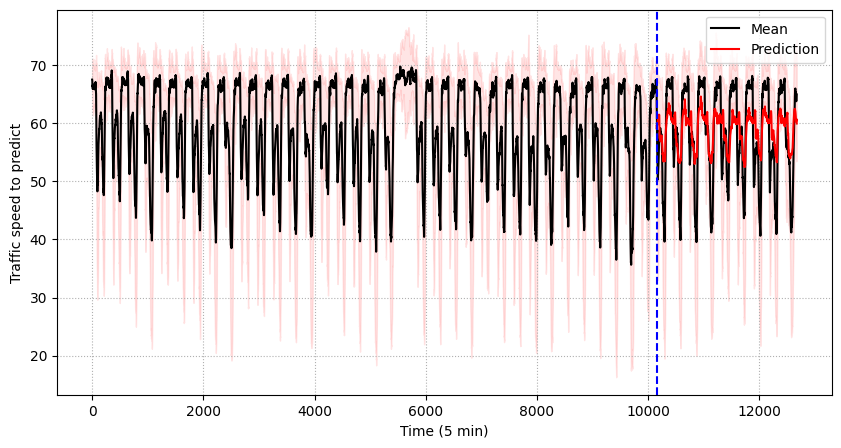

In [ ]:
y_preds = [inverse_zscore(model(snapshot.x.unsqueeze(2), snapshot.edge_index, snapshot.edge_weight).squeeze().detach().numpy(), \
                          speeds.mean(axis=0), speeds.std(axis=0)).mean() for snapshot in test_dataset]

mean = speeds.mean(axis=1)
std = speeds.std(axis=1)

plt.figure(figsize=(10,5))
plt.plot(np.array(mean), 'k-', label='Mean')
plt.plot(range(len(speeds)-len(y_preds), len(speeds)), y_preds, 'r-', label='Prediction')
plt.grid(linestyle=':')
plt.fill_between(mean.index, mean-std, mean+std, color='r', alpha=0.1)
plt.axvline(x=len(speeds)-len(y_preds), color='b', linestyle='--')
plt.xlabel('Time (5 min)')
plt.ylabel('Traffic speed to predict')
plt.legend(loc='upper right')

# Chapter 16. Heterogeneous GraphSAGE

In [1]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

url = 'https://www.hs-coburg.de/fileadmin/hscoburg/WISENT-CIDDS-001.zip'
with urlopen(url) as zurl:
    with ZipFile(BytesIO(zurl.read())) as zfile:
        zfile.extractall('.')

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
import itertools
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import f1_score, classification_report, confusion_matrix

from torch_geometric.loader import DataLoader
from torch_geometric.data import HeteroData
from torch.nn import functional as F
from torch.optim import Adam
from torch import nn
import torch

In [32]:
df = pd.read_csv("CIDDS-001/traffic/OpenStack/CIDDS-001-internal-week1.csv")
df = df.sample(int(1e6))
df

<ipython-input-32-4c1ef2e4745b>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CIDDS-001/traffic/OpenStack/CIDDS-001-internal-week1.csv")


Date first seen  Duration  Proto     Src IP Addr  Src Pt  \
8274645  2017-03-21 17:16:14.640     0.000  TCP    192.168.220.13   43349   
4953329  2017-03-18 13:27:59.057     0.000  TCP         10077_154      80   
4475408  2017-03-17 15:29:57.682     0.000  UDP               DNS      53   
657505   2017-03-15 12:28:52.240     0.631  TCP          10370_33      80   
103106   2017-03-15 06:29:11.342     0.446  TCP     192.168.210.5   58457   
...                          ...       ...    ...             ...     ...   
2174105  2017-03-16 12:46:25.532     0.000  TCP         10194_100     443   
907132   2017-03-15 13:43:23.272     0.004  TCP     192.168.100.6      80   
7848356  2017-03-21 14:28:57.324     0.036  UDP               DNS      53   
2096399  2017-03-16 12:27:56.321     0.351  TCP           10124_1      80   
2992931  2017-03-17 06:31:44.348     0.000  UDP               DNS      53   

            Dst IP Addr   Dst Pt  Packets     Bytes  Flows   Flags  Tos  \
8274645        10056_66    443.0        1        66      1  .A....    0   
4953329   192.168.220.7  48209.0        1        78      1  .A....   32   
4475408  192.168.220.15  44815.0        2       240      1  ......    0   
657505   192.168.220.11  38886.0        2       938      1  .AP...   32   
103106         10309_27    443.0       91      6821      1  .AP.S.    0   
...                 ...      ...      ...       ...    ...     ...  ...   
2174105  192.168.220.11  41562.0        2       132      1  .A...F    0   
907132   192.168.220.16  41654.0        4       272      1  .A..SF    0   
7848356  192.168.220.15  42177.0        2       430      1  ......    0   
2096399  192.168.220.10  38581.0        5      1197      1  .AP.SF   32   
2992931   192.168.210.5  56742.0        1       158      1  ......    0   

          class attackType attackID attackDescription  
8274645  normal        ---      ---               ---  
4953329  normal        ---      ---               ---  
4475408  normal        ---      ---               ---  
657505   normal        ---      ---               ---  
103106   normal        ---      ---               ---  
...         ...        ...      ...               ...  
2174105  normal        ---      ---               ---  
907132   victim        dos        4               ---  
7848356  normal        ---      ---               ---  
2096399  normal        ---      ---               ---  
2992931  normal        ---      ---               ---  

[1000000 rows x 16 columns]

In [33]:
df = df.drop(columns=['Src Pt', 'Dst Pt', 'Flows', 'Tos', 'class', 'attackID', 'attackDescription'])
df['attackType'] = df['attackType'].replace('---', 'benign')
df['Date first seen'] = pd.to_datetime(df['Date first seen'])
df

Date first seen  Duration  Proto     Src IP Addr  \
8274645 2017-03-21 17:16:14.640     0.000  TCP    192.168.220.13   
4953329 2017-03-18 13:27:59.057     0.000  TCP         10077_154   
4475408 2017-03-17 15:29:57.682     0.000  UDP               DNS   
657505  2017-03-15 12:28:52.240     0.631  TCP          10370_33   
103106  2017-03-15 06:29:11.342     0.446  TCP     192.168.210.5   
...                         ...       ...    ...             ...   
2174105 2017-03-16 12:46:25.532     0.000  TCP         10194_100   
907132  2017-03-15 13:43:23.272     0.004  TCP     192.168.100.6   
7848356 2017-03-21 14:28:57.324     0.036  UDP               DNS   
2096399 2017-03-16 12:27:56.321     0.351  TCP           10124_1   
2992931 2017-03-17 06:31:44.348     0.000  UDP               DNS   

            Dst IP Addr  Packets     Bytes   Flags attackType  
8274645        10056_66        1        66  .A....     benign  
4953329   192.168.220.7        1        78  .A....     benign  
4475408  192.168.220.15        2       240  ......     benign  
657505   192.168.220.11        2       938  .AP...     benign  
103106         10309_27       91      6821  .AP.S.     benign  
...                 ...      ...       ...     ...        ...  
2174105  192.168.220.11        2       132  .A...F     benign  
907132   192.168.220.16        4       272  .A..SF        dos  
7848356  192.168.220.15        2       430  ......     benign  
2096399  192.168.220.10        5      1197  .AP.SF     benign  
2992931   192.168.210.5        1       158  ......     benign  

[1000000 rows x 9 columns]

benign        82.9355
dos           14.8465
portScan       2.1573
pingScan       0.0422
bruteForce     0.0185
Name: attackType, dtype: float64


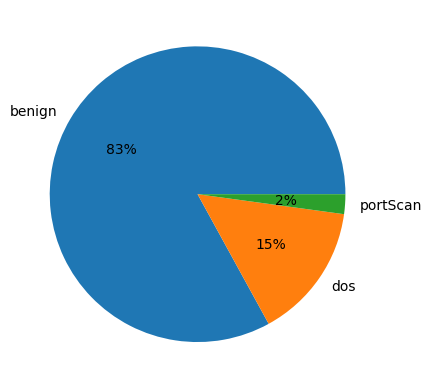

In [34]:
count_labels = df['attackType'].value_counts() / len(df) * 100
print(count_labels)
plt.pie(count_labels[:3], labels=df['attackType'].unique()[:3], autopct='%.0f%%')
plt.show()

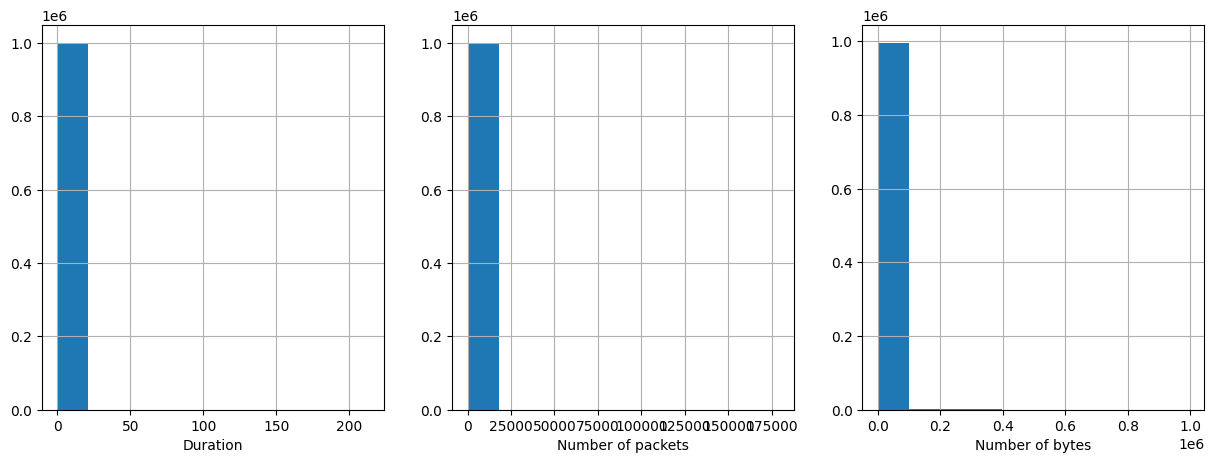

In [35]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15,5))
df['Duration'].hist(ax=ax1)
ax1.set_xlabel("Duration")
df['Packets'].hist(ax=ax2)
ax2.set_xlabel("Number of packets")
pd.to_numeric(df['Bytes'], errors='coerce').hist(ax=ax3)
ax3.set_xlabel("Number of bytes")
plt.show()

In [36]:
df['weekday'] = df['Date first seen'].dt.weekday
df = pd.get_dummies(df, columns=['weekday']).rename(columns = {'weekday_0': 'Monday',
                                                              'weekday_1': 'Tuesday',
                                                              'weekday_2': 'Wednesday',
                                                              'weekday_3': 'Thursday',
                                                              'weekday_4': 'Friday',
                                                              'weekday_5': 'Saturday',
                                                              'weekday_6': 'Sunday',
                                                             })

df['daytime'] = (df['Date first seen'].dt.second +df['Date first seen'].dt.minute*60 + df['Date first seen'].dt.hour*60*60)/(24*60*60)

In [37]:
def one_hot_flags(input):
    return [1 if char1 == char2 else 0 for char1, char2 in zip('APRSF', input[1:])]

df = df.reset_index(drop=True)
ohe_flags = one_hot_flags(df['Flags'].to_numpy())
ohe_flags = df['Flags'].apply(one_hot_flags).to_list()
df[['ACK', 'PSH', 'RST', 'SYN', 'FIN']] = pd.DataFrame(ohe_flags, columns=['ACK', 'PSH', 'RST', 'SYN', 'FIN'])
df = df.drop(columns=['Date first seen', 'Flags'])
df

Duration  Proto     Src IP Addr     Dst IP Addr  Packets     Bytes  \
0          0.000  TCP    192.168.220.13        10056_66        1        66   
1          0.000  TCP         10077_154   192.168.220.7        1        78   
2          0.000  UDP               DNS  192.168.220.15        2       240   
3          0.631  TCP          10370_33  192.168.220.11        2       938   
4          0.446  TCP     192.168.210.5        10309_27       91      6821   
...          ...    ...             ...             ...      ...       ...   
999995     0.000  TCP         10194_100  192.168.220.11        2       132   
999996     0.004  TCP     192.168.100.6  192.168.220.16        4       272   
999997     0.036  UDP               DNS  192.168.220.15        2       430   
999998     0.351  TCP           10124_1  192.168.220.10        5      1197   
999999     0.000  UDP               DNS   192.168.210.5        1       158   

       attackType  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
0          benign       0        1          0         0       0         0   
1          benign       0        0          0         0       0         1   
2          benign       0        0          0         0       1         0   
3          benign       0        0          1         0       0         0   
4          benign       0        0          1         0       0         0   
...           ...     ...      ...        ...       ...     ...       ...   
999995     benign       0        0          0         1       0         0   
999996        dos       0        0          1         0       0         0   
999997     benign       0        1          0         0       0         0   
999998     benign       0        0          0         1       0         0   
999999     benign       0        0          0         0       1         0   

        Sunday   daytime  ACK  PSH  RST  SYN  FIN  
0            0  0.719606    1    0    0    0    0  
1            0  0.561100    1    0    0    0    0  
2            0  0.645799    0    0    0    0    0  
3            0  0.520046    1    1    0    0    0  
4            0  0.270266    1    1    0    1    0  
...        ...       ...  ...  ...  ...  ...  ...  
999995       0  0.532234    1    0    0    0    1  
999996       0  0.571794    1    0    0    1    1  
999997       0  0.603437    0    0    0    0    0  
999998       0  0.519398    1    1    0    1    1  
999999       0  0.272037    0    0    0    0    0  

[1000000 rows x 20 columns]

In [38]:
temp = pd.DataFrame()
temp['SrcIP'] = df['Src IP Addr'].astype(str)
temp['SrcIP'][~temp['SrcIP'].str.contains('\d{1,3}\.', regex=True)] = '0.0.0.0'
temp = temp['SrcIP'].str.split('.', expand=True).rename(columns = {2: 'ipsrc3', 3: 'ipsrc4'}).astype(int)[['ipsrc3', 'ipsrc4']]
temp['ipsrc'] = temp['ipsrc3'].apply(lambda x: format(x, "b").zfill(8)) + temp['ipsrc4'].apply(lambda x: format(x, "b").zfill(8))
df = df.join(temp['ipsrc'].str.split('', expand=True)
            .drop(columns=[0, 17])
            .rename(columns=dict(enumerate([f'ipsrc_{i}' for i in range(17)])))
            .astype('int32'))
df.head(5)

Duration  Proto     Src IP Addr     Dst IP Addr  Packets     Bytes  \
0     0.000  TCP    192.168.220.13        10056_66        1        66   
1     0.000  TCP         10077_154   192.168.220.7        1        78   
2     0.000  UDP               DNS  192.168.220.15        2       240   
3     0.631  TCP          10370_33  192.168.220.11        2       938   
4     0.446  TCP     192.168.210.5        10309_27       91      6821   

  attackType  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
0     benign       0        1          0         0       0         0       0   
1     benign       0        0          0         0       0         1       0   
2     benign       0        0          0         0       1         0       0   
3     benign       0        0          1         0       0         0       0   
4     benign       0        0          1         0       0         0       0   

    daytime  ACK  PSH  RST  SYN  FIN  ipsrc_1  ipsrc_2  ipsrc_3  ipsrc_4  \
0  0.719606    1    0    0    0    0        1        1        0        1   
1  0.561100    1    0    0    0    0        0        0        0        0   
2  0.645799    0    0    0    0    0        0        0        0        0   
3  0.520046    1    1    0    0    0        0        0        0        0   
4  0.270266    1    1    0    1    0        1        1        0        1   

   ipsrc_5  ipsrc_6  ipsrc_7  ipsrc_8  ipsrc_9  ipsrc_10  ipsrc_11  ipsrc_12  \
0        1        1        0        0        0         0         0         0   
1        0        0        0        0        0         0         0         0   
2        0        0        0        0        0         0         0         0   
3        0        0        0        0        0         0         0         0   
4        0        0        1        0        0         0         0         0   

   ipsrc_13  ipsrc_14  ipsrc_15  ipsrc_16  
0         1         1         0         1  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         1         0         1

In [39]:
temp = pd.DataFrame()
temp['DstIP'] = df['Dst IP Addr'].astype(str)
temp['DstIP'][~temp['DstIP'].str.contains('\d{1,3}\.', regex=True)] = '0.0.0.0'
temp = temp['DstIP'].str.split('.', expand=True).rename(columns = {2: 'ipdst3', 3: 'ipdst4'}).astype(int)[['ipdst3', 'ipdst4']]
temp['ipdst'] = temp['ipdst3'].apply(lambda x: format(x, "b").zfill(8)) \
                + temp['ipdst4'].apply(lambda x: format(x, "b").zfill(8))
df = df.join(temp['ipdst'].str.split('', expand=True)
            .drop(columns=[0, 17])
            .rename(columns=dict(enumerate([f'ipdst_{i}' for i in range(17)])))
            .astype('int32'))
df.head(5)

Duration  Proto     Src IP Addr     Dst IP Addr  Packets     Bytes  \
0     0.000  TCP    192.168.220.13        10056_66        1        66   
1     0.000  TCP         10077_154   192.168.220.7        1        78   
2     0.000  UDP               DNS  192.168.220.15        2       240   
3     0.631  TCP          10370_33  192.168.220.11        2       938   
4     0.446  TCP     192.168.210.5        10309_27       91      6821   

  attackType  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
0     benign       0        1          0         0       0         0       0   
1     benign       0        0          0         0       0         1       0   
2     benign       0        0          0         0       1         0       0   
3     benign       0        0          1         0       0         0       0   
4     benign       0        0          1         0       0         0       0   

    daytime  ACK  PSH  RST  SYN  FIN  ipsrc_1  ipsrc_2  ipsrc_3  ipsrc_4  \
0  0.719606    1    0    0    0    0        1        1        0        1   
1  0.561100    1    0    0    0    0        0        0        0        0   
2  0.645799    0    0    0    0    0        0        0        0        0   
3  0.520046    1    1    0    0    0        0        0        0        0   
4  0.270266    1    1    0    1    0        1        1        0        1   

   ipsrc_5  ipsrc_6  ipsrc_7  ipsrc_8  ipsrc_9  ipsrc_10  ipsrc_11  ipsrc_12  \
0        1        1        0        0        0         0         0         0   
1        0        0        0        0        0         0         0         0   
2        0        0        0        0        0         0         0         0   
3        0        0        0        0        0         0         0         0   
4        0        0        1        0        0         0         0         0   

   ipsrc_13  ipsrc_14  ipsrc_15  ipsrc_16  ipdst_1  ipdst_2  ipdst_3  ipdst_4  \
0         1         1         0         1        0        0        0        0   
1         0         0         0         0        1        1        0        1   
2         0         0         0         0        1        1        0        1   
3         0         0         0         0        1        1        0        1   
4         0         1         0         1        0        0        0        0   

   ipdst_5  ipdst_6  ipdst_7  ipdst_8  ipdst_9  ipdst_10  ipdst_11  ipdst_12  \
0        0        0        0        0        0         0         0         0   
1        1        1        0        0        0         0         0         0   
2        1        1        0        0        0         0         0         0   
3        1        1        0        0        0         0         0         0   
4        0        0        0        0        0         0         0         0   

   ipdst_13  ipdst_14  ipdst_15  ipdst_16  
0         0         0         0         0  
1         0         1         1         1  
2         1         1         1         1  
3         1         0         1         1  
4         0         0         0         0

In [40]:
m_index = df[pd.to_numeric(df['Bytes'], errors='coerce').isnull() == True].index
df['Bytes'].loc[m_index] = df['Bytes'].loc[m_index].apply(lambda x: 10e6 * float(x.strip().split()[0]))
df['Bytes'] = pd.to_numeric(df['Bytes'], errors='coerce', downcast='integer')

<ipython-input-40-c8056af650b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bytes'].loc[m_index] = df['Bytes'].loc[m_index].apply(lambda x: 10e6 * float(x.strip().split()[0]))


In [41]:
df = pd.get_dummies(df, prefix='', prefix_sep='', columns=['Proto', 'attackType'])
df.head(5)

Duration     Src IP Addr     Dst IP Addr  Packets  Bytes  Monday  Tuesday  \
0     0.000  192.168.220.13        10056_66        1     66       0        1   
1     0.000       10077_154   192.168.220.7        1     78       0        0   
2     0.000             DNS  192.168.220.15        2    240       0        0   
3     0.631        10370_33  192.168.220.11        2    938       0        0   
4     0.446   192.168.210.5        10309_27       91   6821       0        0   

   Wednesday  Thursday  Friday  Saturday  Sunday   daytime  ACK  PSH  RST  \
0          0         0       0         0       0  0.719606    1    0    0   
1          0         0       0         1       0  0.561100    1    0    0   
2          0         0       1         0       0  0.645799    0    0    0   
3          1         0       0         0       0  0.520046    1    1    0   
4          1         0       0         0       0  0.270266    1    1    0   

   SYN  FIN  ipsrc_1  ipsrc_2  ipsrc_3  ipsrc_4  ipsrc_5  ipsrc_6  ipsrc_7  \
0    0    0        1        1        0        1        1        1        0   
1    0    0        0        0        0        0        0        0        0   
2    0    0        0        0        0        0        0        0        0   
3    0    0        0        0        0        0        0        0        0   
4    1    0        1        1        0        1        0        0        1   

   ipsrc_8  ipsrc_9  ipsrc_10  ipsrc_11  ipsrc_12  ipsrc_13  ipsrc_14  \
0        0        0         0         0         0         1         1   
1        0        0         0         0         0         0         0   
2        0        0         0         0         0         0         0   
3        0        0         0         0         0         0         0   
4        0        0         0         0         0         0         1   

   ipsrc_15  ipsrc_16  ipdst_1  ipdst_2  ipdst_3  ipdst_4  ipdst_5  ipdst_6  \
0         0         1        0        0        0        0        0        0   
1         0         0        1        1        0        1        1        1   
2         0         0        1        1        0        1        1        1   
3         0         0        1        1        0        1        1        1   
4         0         1        0        0        0        0        0        0   

   ipdst_7  ipdst_8  ipdst_9  ipdst_10  ipdst_11  ipdst_12  ipdst_13  \
0        0        0        0         0         0         0         0   
1        0        0        0         0         0         0         0   
2        0        0        0         0         0         0         1   
3        0        0        0         0         0         0         1   
4        0        0        0         0         0         0         0   

   ipdst_14  ipdst_15  ipdst_16  ICMP   IGMP   TCP    UDP    benign  \
0         0         0         0      0      0      1      0       1   
1         1         1         1      0      0      1      0       1   
2         1         1         1      0      0      0      1       1   
3         0         1         1      0      0      1      0       1   
4         0         0         0      0      0      1      0       1   

   bruteForce  dos  pingScan  portScan  
0           0    0         0         0  
1           0    0         0         0  
2           0    0         0         0  
3           0    0         0         0  
4           0    0         0         0

In [42]:
labels = ['benign', 'bruteForce', 'dos', 'pingScan', 'portScan']
df_train, df_test = train_test_split(df, random_state=0, test_size=0.2, stratify=df[labels])
df_val, df_test = train_test_split(df_test, random_state=0, test_size=0.5, stratify=df_test[labels])

In [43]:
scaler = PowerTransformer()
df_train[['Duration', 'Packets', 'Bytes']] = scaler.fit_transform(df_train[['Duration', 'Packets', 'Bytes']])
df_val[['Duration', 'Packets', 'Bytes']] = scaler.transform(df_val[['Duration', 'Packets', 'Bytes']])
df_test[['Duration', 'Packets', 'Bytes']] = scaler.transform(df_test[['Duration', 'Packets', 'Bytes']])

In [44]:
df_train[df_train['benign'] == 1]

Duration    Src IP Addr    Dst IP Addr   Packets     Bytes  Monday  \
495232 -0.586158      11397_105  192.168.200.8 -0.993243 -1.009291       0   
28743  -0.586158      10343_115  192.168.220.7 -0.993243 -1.009291       0   
537803 -0.586158  192.168.210.5            DNS -0.993243 -0.883722       0   
901380  0.457684  192.168.220.4       10170_24  0.118081 -0.131317       0   
424852  2.395134  192.168.200.8      10100_133  0.118081  1.088272       0   
...          ...            ...            ...       ...       ...     ...   
904325 -0.485112       10135_94  192.168.200.8  0.118081 -0.358271       0   
64283  -0.586158            DNS  192.168.200.8 -0.993243 -0.190936       0   
668811 -0.586158  192.168.220.4       10143_80 -0.993243 -1.317784       0   
576335 -0.586158  192.168.220.4      10593_173 -0.993243 -1.009291       0   
804935 -0.586158  192.168.200.8      10593_173 -0.993243 -1.288443       0   

        Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday   daytime  ACK  \
495232        0          0         0       1         0       0  0.454132    1   
28743         0          0         1       0         0       0  0.388356    1   
537803        1          0         0       0         0       0  0.690000    0   
901380        0          1         0       0         0       0  0.255093    1   
424852        1          0         0       0         0       0  0.745741    1   
...         ...        ...       ...     ...       ...     ...       ...  ...   
904325        0          0         1       0         0       0  0.633194    1   
64283         0          0         0       0         0       1  0.666273    0   
668811        0          0         1       0         0       0  0.594618    1   
576335        0          0         1       0         0       0  0.653067    1   
804935        0          0         1       0         0       0  0.548854    1   

        PSH  RST  SYN  FIN  ipsrc_1  ipsrc_2  ipsrc_3  ipsrc_4  ipsrc_5  \
495232    0    0    0    0        0        0        0        0        0   
28743     0    0    0    0        0        0        0        0        0   
537803    0    0    0    0        1        1        0        1        0   
901380    0    0    0    1        1        1        0        1        1   
424852    1    0    0    0        1        1        0        0        1   
...     ...  ...  ...  ...      ...      ...      ...      ...      ...   
904325    0    0    0    1        0        0        0        0        0   
64283     0    0    0    0        0        0        0        0        0   
668811    0    0    0    0        1        1        0        1        1   
576335    0    0    0    0        1        1        0        1        1   
804935    0    0    0    0        1        1        0        0        1   

        ipsrc_6  ipsrc_7  ipsrc_8  ipsrc_9  ipsrc_10  ipsrc_11  ipsrc_12  \
495232        0        0        0        0         0         0         0   
28743         0        0        0        0         0         0         0   
537803        0        1        0        0         0         0         0   
901380        1        0        0        0         0         0         0   
424852        0        0        0        0         0         0         0   
...         ...      ...      ...      ...       ...       ...       ...   
904325        0        0        0        0         0         0         0   
64283         0        0        0        0         0         0         0   
668811        1        0        0        0         0         0         0   
576335        1        0        0        0         0         0         0   
804935        0        0        0        0         0         0         0   

        ipsrc_13  ipsrc_14  ipsrc_15  ipsrc_16  ipdst_1  ipdst_2  ipdst_3  \
495232         0         0         0         0        1        1        0   
28743          0         0         0         0        1        1        0   
537803         0         1         0         1       

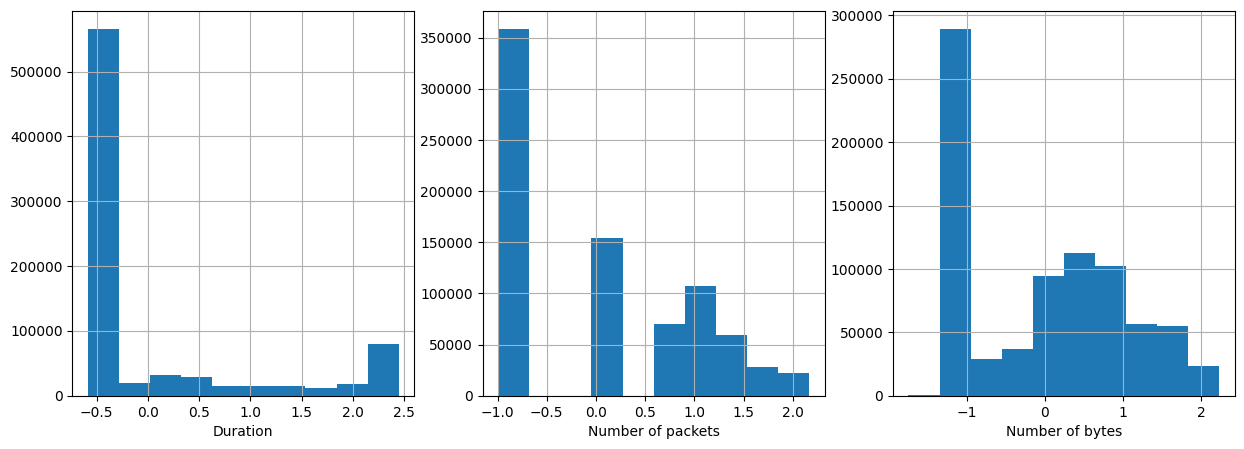

In [45]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15,5))
df_train['Duration'].hist(ax=ax1)
ax1.set_xlabel("Duration")
df_train['Packets'].hist(ax=ax2)
ax2.set_xlabel("Number of packets")
df_train['Bytes'].hist(ax=ax3)
ax3.set_xlabel("Number of bytes")
plt.show()

In [46]:
from tqdm import tqdm

BATCH_SIZE = 16
features_host = [f'ipsrc_{i}' for i in range(1, 17)] + [f'ipdst_{i}' for i in range(1, 17)]
features_flow = ['daytime', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Duration', 'Packets', 'Bytes', 'ACK', 'PSH', 'RST', 'SYN', 'FIN', 'ICMP ', 'IGMP ', 'TCP  ', 'UDP  ']

def create_dataloader(df, subgraph_size=1024):
    data = []
    n_subgraphs = len(df)

    for i in tqdm(range(1, n_subgraphs + 1)):
        subgraph = df[(i-1) * subgraph_size : i * subgraph_size]
        src_ip = subgraph['Src IP Addr'].to_numpy()
        dst_ip = subgraph['Dst IP Addr'].to_numpy()

        ip_map = {ip: index for index, ip in enumerate(np.unique(np.append(src_ip, dst_ip)))}

        host_to_flow, flow_to_host = get_connections(ip_map, src_ip, dst_ip)

        batch = HeteroData()
        batch['host'].x = torch.Tensor(subgraph[features_host].to_numpy()).float()
        batch['flow'].x = torch.Tensor(subgraph[features_flow].to_numpy()).float()
        batch['flow'].y = torch.Tensor(subgraph[labels].to_numpy()).float()
        batch['host', 'flow'].edge_index = host_to_flow
        batch['flow', 'host'].edge_index = flow_to_host
        data.append(batch)

    return DataLoader(data, batch_size=BATCH_SIZE)

def get_connections(ip_map, src_ip, dst_ip):
    src1 = [ip_map[ip] for ip in src_ip]
    src2 = [ip_map[ip] for ip in dst_ip]
    src = np.column_stack((src1, src2)).flatten()

    dst = list(range(len(src_ip)))
    dst = np.column_stack((dst, dst)).flatten()

    return torch.Tensor([src, dst]).int(), torch.Tensor([dst, src]).int()

train_loader = create_dataloader(df_train)
val_loader = create_dataloader(df_val)
test_loader = create_dataloader(df_test)

100%|██████████| 100000/100000 [03:52<00:00, 430.37it/s]


In [54]:
import torch_geometric.transforms as T
from torch_geometric.nn import Linear, HeteroConv, SAGEConv

class HeteroGNN(torch.nn.Module):
    def __init__(self, dim_h, dim_out, num_layers):
        super().__init__()
        self.convs = torch.nn.ModuleList()
        for _ in range(num_layers):
            conv = HeteroConv({
                ('host', 'to', 'flow'): SAGEConv((-1, -1), dim_h, add_self_loops=False),
                ('flow', 'to', 'host'): SAGEConv((-1, -1), dim_h, add_self_loops=False)
            }, aggr='sum')
            self.convs.append(conv)

        self.lin = Linear(dim_h, dim_out)

    def forward(self, x_dict, edge_index_dict):
        for conv in self.convs:
            x_dict = conv(x_dict, edge_index_dict)
            x_dict = {key: F.leaky_relu(x) for key, x in x_dict.items()}
        return self.lin(x_dict['flow'])

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = HeteroGNN(dim_h=64, dim_out=5, num_layers=3).to(device)
optimizer = Adam(model.parameters(), lr=0.001)

@torch.no_grad()
def test(loader):
    model.eval()
    y_pred = []
    y_true = []
    n_subgraphs = 0
    total_loss = 0

    for batch in loader:
        batch.to(device)
        out = model(batch.x_dict, batch.edge_index_dict)
        loss = F.cross_entropy(out, batch['flow'].y.float())
        y_pred.append(out.argmax(dim=1))
        y_true.append(batch['flow'].y.argmax(dim=1))
        n_subgraphs += BATCH_SIZE
        total_loss += float(loss) * BATCH_SIZE

    y_pred = torch.cat(y_pred).cpu()
    y_true = torch.cat(y_true).cpu()
    f1score = f1_score(y_true, y_pred, average='macro')

    return total_loss/n_subgraphs, f1score, y_pred, y_true

model.train()
for epoch in range(11):
    n_subgraphs = 0
    total_loss = 0

    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        batch.to(device)
        out = model(batch.x_dict, batch.edge_index_dict)
        loss = F.cross_entropy(out, batch['flow'].y.float())
        loss.backward()
        optimizer.step()

        n_subgraphs += BATCH_SIZE
        total_loss += float(loss) * BATCH_SIZE

    val_loss, f1score, _, _ = test(val_loader)
    print(f'Val F1-score: {f1score:.4f}')

100%|██████████| 50000/50000 [04:29<00:00, 185.76it/s]


Val F1-score: 0.3891


100%|██████████| 50000/50000 [04:29<00:00, 185.51it/s]


Val F1-score: 0.5452


100%|██████████| 50000/50000 [04:32<00:00, 183.58it/s]


Val F1-score: 0.7019


100%|██████████| 50000/50000 [04:31<00:00, 184.26it/s]


Val F1-score: 0.5919


100%|██████████| 50000/50000 [04:28<00:00, 186.50it/s]


Val F1-score: 0.6993


100%|██████████| 50000/50000 [04:26<00:00, 187.41it/s]


Val F1-score: 0.7435


100%|██████████| 50000/50000 [04:30<00:00, 184.76it/s]


Val F1-score: 0.6760


100%|██████████| 50000/50000 [04:30<00:00, 185.00it/s]


Val F1-score: 0.6801


100%|██████████| 50000/50000 [04:30<00:00, 184.95it/s]


Val F1-score: 0.6565


100%|██████████| 50000/50000 [04:31<00:00, 184.00it/s]


Val F1-score: 0.7836


100%|██████████| 50000/50000 [04:33<00:00, 182.82it/s]


Val F1-score: 0.7811


In [55]:
_, _, y_pred, y_true = test(test_loader)

print(classification_report(y_true, y_pred, target_names=labels, digits=4))

              precision    recall  f1-score   support

      benign     0.9982    0.9998    0.9990     82935
  bruteForce     1.0000    0.2105    0.3478        19
         dos     0.9999    0.9931    0.9965     14846
    pingScan     0.4776    0.7619    0.5872        42
    portScan     0.9886    0.9676    0.9780      2158

    accuracy                         0.9979    100000
   macro avg     0.8929    0.7866    0.7817    100000
weighted avg     0.9980    0.9979    0.9979    100000



([<matplotlib.patches.Wedge at 0x7c3acbab9930>,
 [Text(0.0488860567689072, 1.0989131692056417, 'benign'),
  Text(-0.6412774143953438, -0.8937355748690005, 'bruteForce'),
  Text(0.654450689803123, -0.8841347717493169, 'dos'),
  Text(0.9633084572892662, -0.5310713851404295, 'pingScan'),
  Text(1.0879442132987642, -0.16241117187476034, 'portScan')],
 [Text(0.02666512187394938, 0.5994071832030773, '49%'),
  Text(-0.3497876805792784, -0.48749213174672745, '33%'),
  Text(0.3569731035289762, -0.48225533004508186, '7%'),
  Text(0.525440976703236, -0.2896753009856888, '7%'),
  Text(0.5934241163447804, -0.08858791193168744, '5%')])

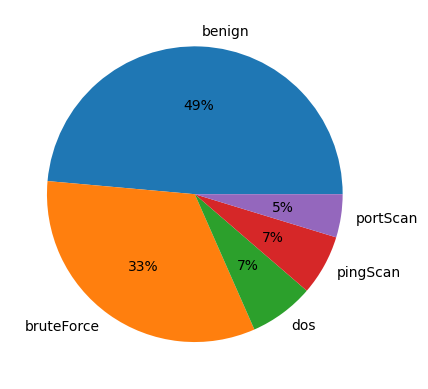

In [56]:
df_pred = pd.DataFrame([y_pred.numpy(), y_true.numpy()]).T
df_pred.columns = ['pred', 'true']
plt.pie(df_pred['true'][df_pred['pred'] != df_pred['true']].value_counts(), labels=labels, autopct='%.0f%%')

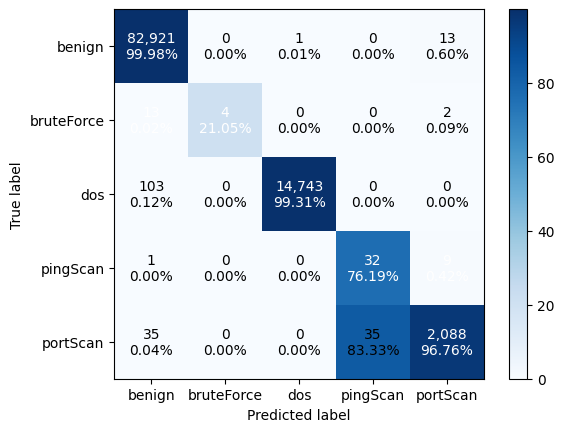

In [57]:
matrix = confusion_matrix(y_true, y_pred)
norm_matrix = matrix / matrix.sum(axis=1) * 100

plt.imshow(norm_matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)

for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    text = f"{matrix[i,j]:,}\n{norm_matrix[i,j]:.2f}%"
    plt.text(j, i, text,
            horizontalalignment='center', verticalalignment='center',
            color='white' if matrix[i,j] >= matrix[i,:].mean() else 'black')
plt.show()

# Chapter 17. LightGCN

In [1]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

url = 'http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip'
with urlopen(url) as zurl:
    with ZipFile(BytesIO(zurl.read())) as zfile:
        zfile.extractall('.')

In [3]:
import pandas as pd

ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='latin-1')
users = pd.read_csv('BX-Users.csv', sep=';', encoding='latin-1')
books = pd.read_csv('BX-Books.csv', sep=';', encoding='latin-1', error_bad_lines=False)

<ipython-input-3-c6339752b52e>:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('BX-Books.csv', sep=';', encoding='latin-1', error_bad_lines=False)
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 

In [4]:
ratings

User-ID         ISBN  Book-Rating
0         276725   034545104X            0
1         276726   0155061224            5
2         276727   0446520802            0
3         276729   052165615X            3
4         276729   0521795028            6
...          ...          ...          ...
1149775   276704   1563526298            9
1149776   276706   0679447156            0
1149777   276709   0515107662           10
1149778   276721   0590442449           10
1149779   276723  05162443314            8

[1149780 rows x 3 columns]

In [5]:
users

User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]

In [6]:
books

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bruce Wright                2001   
2               Carlo D'Este                1991   
3           Gina Bari Kolata                1999   
4            E. J. W. Barber                1999   
...                      ...                 ...   
271355        Paula Danziger                1988   
271356            Teri Sloat                1991   
271357      Christine Wicker                2004   
271358                 Plato                1996   
271359   Christopher  Biffle                2000   

                                               Publisher  \
0                                Oxford University Press   
1                                  HarperFlamingo Canada   
2                                        HarperPerennial   
3                                   Farrar Straus Giroux   
4                             W. W. Norton &amp; Company   
...                                                  ...   
271355                   Random House Childrens Pub (Mm)   
271356                                      Dutton Books   
271357                                HarperSanFrancisco   
271358                           Oxford University Press   
271359  McGraw-Hill Humanities/Social Sciences/Languages   

                                              Image-URL-S  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-M  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-L  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http://images.ama

<Axes: xlabel='Book-Rating', ylabel='count'>

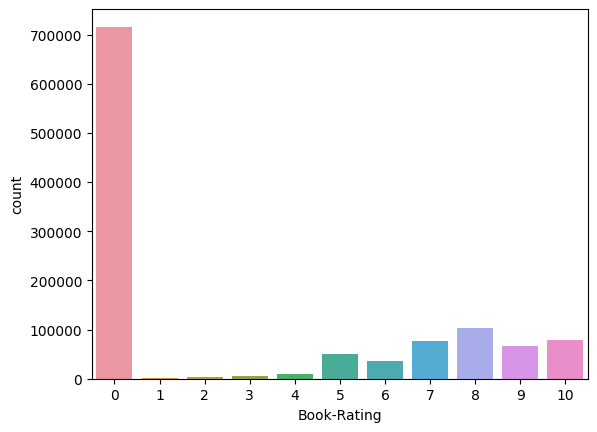

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=ratings['Book-Rating'])

Text(0, 0.5, 'Count')

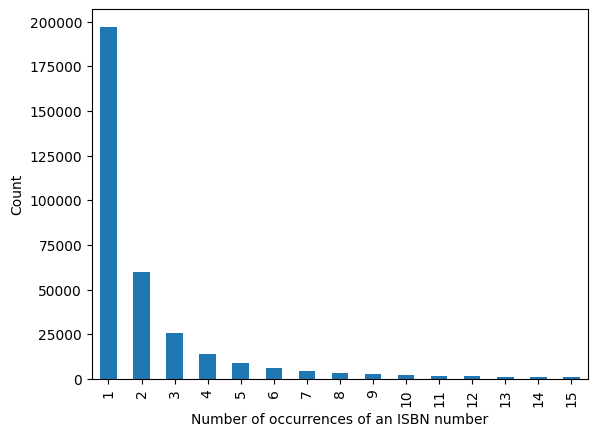

In [8]:
isbn_counts = ratings.groupby('ISBN').size()
count_occurrences = isbn_counts.value_counts()
count_occurrences[:15].plot(kind='bar')
plt.xlabel("Number of occurrences of an ISBN number")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

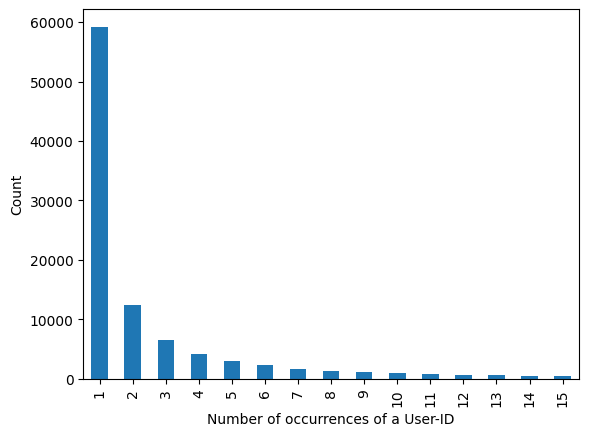

In [9]:
userid_counts = ratings.groupby('User-ID').size()
count_occurrences = userid_counts.value_counts()
count_occurrences[:15].plot(kind='bar')
plt.xlabel("Number of occurrences of a User-ID")
plt.ylabel("Count")

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split

import torch
import torch.nn.functional as F
from torch import nn, optim, Tensor

from torch_geometric.utils import structured_negative_sampling
from torch_geometric.nn.conv.gcn_conv import gcn_norm
from torch_geometric.nn import LGConv

In [12]:
df = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='latin-1')
users = pd.read_csv('BX-Users.csv', sep=';', encoding='latin-1')
books = pd.read_csv('BX-Books.csv', sep=';', encoding='latin-1', error_bad_lines=False)

df = df.loc[df['ISBN'].isin(books['ISBN'].unique()) & df['User-ID'].isin(users['User-ID'].unique())]

df = df[df['Book-Rating'] >= 8].iloc[:100000]

<ipython-input-12-f086ec637a8f>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('BX-Books.csv', sep=';', encoding='latin-1', error_bad_lines=False)
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected

In [13]:
user_mapping = {userid: i for i, userid in enumerate(df['User-ID'].unique())}
item_mapping = {isbn: i for i, isbn in enumerate(df['ISBN'].unique())}

num_users = len(user_mapping)
num_items = len(item_mapping)
num_total = num_users + num_items

user_ids = torch.LongTensor([user_mapping[i] for i in df['User-ID']])
item_ids = torch.LongTensor([item_mapping[i] for i in df['ISBN']])
edge_index = torch.stack((user_ids, item_ids))

train_index, test_index = train_test_split(range(len(df)), test_size=0.2, random_state=0)
val_index, test_index = train_test_split(test_index, test_size=0.5, random_state=0)

train_edge_index = edge_index[:, train_index]
val_edge_index = edge_index[:, val_index]
test_edge_index = edge_index[:, test_index]

In [14]:
def sample_mini_batch(edge_index):
    index = np.random.choice(range(edge_index.shape[1]), size=BATCH_SIZE)

    edge_index = structured_negative_sampling(edge_index)
    edge_index = torch.stack(edge_index, dim=0)

    user_index = edge_index[0, index]
    pos_item_index = edge_index[1, index]
    neg_item_index = edge_index[2, index]

    return user_index, pos_item_index, neg_item_index

In [19]:
class LightGCN(nn.Module):
    def __init__(self, num_users, num_items, num_layers=4, dim_h=64):
        super().__init__()
        self.num_users = num_users
        self.num_items = num_items
        self.emb_users = nn.Embedding(num_embeddings=self.num_users, embedding_dim=dim_h)
        self.emb_items = nn.Embedding(num_embeddings=self.num_items, embedding_dim=dim_h)

        self.convs = nn.ModuleList(LGConv() for _ in range(num_layers))

        nn.init.normal_(self.emb_users.weight, std=0.01)
        nn.init.normal_(self.emb_items.weight, std=0.01)

    def forward(self, edge_index):
        emb = torch.cat([self.emb_users.weight, self.emb_items.weight])
        embs = [emb]

        for conv in self.convs:
            emb = conv(x=emb, edge_index=edge_index)
            embs.append(emb)

        emb_final = torch.mean(torch.stack(embs, dim=1), dim=1)

        emb_users_final, emb_items_final = torch.split(emb_final, [self.num_users, self.num_items])

        return emb_users_final, self.emb_users.weight, emb_items_final, self.emb_items.weight

model = LightGCN(num_users, num_items)

def bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items):
    reg_loss = LAMBDA * (emb_users.norm().pow(2) +
                         emb_pos_items.norm().pow(2) +
                         emb_neg_items.norm().pow(2))

    pos_ratings = torch.mul(emb_users_final, emb_pos_items_final).sum(dim=-1)
    neg_ratings = torch.mul(emb_users_final, emb_neg_items_final).sum(dim=-1)

    bpr_loss = torch.mean(torch.nn.functional.softplus(pos_ratings - neg_ratings))

    return -bpr_loss + reg_loss

In [20]:
def get_user_items(edge_index):
    user_items = dict()
    for i in range(edge_index.shape[1]):
        user = edge_index[0][i].item()
        item = edge_index[1][i].item()
        if user not in user_items:
            user_items[user] = []
        user_items[user].append(item)
    return user_items

def compute_recall_at_k(items_ground_truth, items_predicted):
    num_correct_pred = np.sum(items_predicted, axis=1)
    num_total_pred = np.array([len(items_ground_truth[i]) for i in range(len(items_ground_truth))])

    recall = np.mean(num_correct_pred / num_total_pred)

    return recall

def compute_ndcg_at_k(items_ground_truth, items_predicted):
    test_matrix = np.zeros((len(items_predicted), K))

    for i, items in enumerate(items_ground_truth):
        length = min(len(items), K)
        test_matrix[i, :length] = 1

    max_r = test_matrix
    idcg = np.sum(max_r * 1. / np.log2(np.arange(2, K + 2)), axis=1)
    dcg = items_predicted * (1. / np.log2(np.arange(2, K + 2)))
    dcg = np.sum(dcg, axis=1)
    idcg[idcg == 0.] = 1.
    ndcg = dcg / idcg
    ndcg[np.isnan(ndcg)] = 0.

    return np.mean(ndcg)

def get_metrics(model, edge_index, exclude_edge_indices):

    ratings = torch.matmul(model.emb_users.weight, model.emb_items.weight.T)

    for exclude_edge_index in exclude_edge_indices:
        user_pos_items = get_user_items(exclude_edge_index)
        exclude_users = []
        exclude_items = []
        for user, items in user_pos_items.items():
            exclude_users.extend([user] * len(items))
            exclude_items.extend(items)
        ratings[exclude_users, exclude_items] = -1024

    _, top_K_items = torch.topk(ratings, k=K)

    users = edge_index[0].unique()

    test_user_pos_items = get_user_items(edge_index)

    test_user_pos_items_list = [test_user_pos_items[user.item()] for user in users]

    items_predicted = []
    for user in users:
        ground_truth_items = test_user_pos_items[user.item()]
        label = list(map(lambda x: x in ground_truth_items, top_K_items[user]))
        items_predicted.append(label)

    recall = compute_recall_at_k(test_user_pos_items_list, items_predicted)
    ndcg = compute_ndcg_at_k(test_user_pos_items_list, items_predicted)

    return recall, ndcg

In [26]:
def test(model, edge_index, exclude_edge_indices):
    emb_users_final, emb_users, emb_items_final, emb_items = model.forward(edge_index)
    user_indices, pos_item_indices, neg_item_indices = structured_negative_sampling(edge_index, contains_neg_self_loops=False)

    emb_users_final, emb_users = emb_users_final[user_indices], emb_users[user_indices]

    emb_pos_items_final, emb_pos_items = emb_items_final[pos_item_indices], emb_items[pos_item_indices]
    emb_neg_items_final, emb_neg_items = emb_items_final[neg_item_indices], emb_items[neg_item_indices]

    loss = bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items).item()

    recall, ndcg = get_metrics(model, edge_index, exclude_edge_indices)

    return loss, recall, ndcg

In [27]:
K = 20
LAMBDA = 1e-6
BATCH_SIZE = 1024

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
edge_index = edge_index.to(device)
train_edge_index = train_edge_index.to(device)
val_edge_index = val_edge_index.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

num_batch = int(len(train_index) / BATCH_SIZE)
for epoch in range(31):
    model.train()
    for _ in range(num_batch):
        optimizer.zero_grad()
        emb_users_final, emb_users, emb_items_final, emb_items = model.forward(train_edge_index)

        user_indices, pos_item_indices, neg_item_indices = sample_mini_batch(train_edge_index)

        emb_users_final, emb_users = emb_users_final[user_indices], emb_users[user_indices]
        emb_pos_items_final, emb_pos_items = emb_items_final[pos_item_indices], emb_items[pos_item_indices]
        emb_neg_items_final, emb_neg_items = emb_items_final[neg_item_indices], emb_items[neg_item_indices]

        train_loss = bpr_loss(emb_users_final, emb_users, emb_pos_items_final, emb_pos_items, emb_neg_items_final, emb_neg_items)

        train_loss.backward()
        optimizer.step()

    if epoch % 5 == 0:
        model.eval()
        val_loss, recall, ndcg = test(model, val_edge_index, [train_edge_index])
        print(f"Epoch {epoch} | Train loss: {train_loss.item():.5f} | Val loss: {val_loss:.5f} | Val recall@{K}: {recall:.5f} | Val ndcg@{K}: {ndcg:.5f}")

test_loss, test_recall, test_ndcg = test(model, test_edge_index.to(device), [train_edge_index, val_edge_index])
print(f"Test loss: {test_loss:.5f} | Test recall@{K}: {test_recall:.5f} | Test ndcg@{K}: {test_ndcg:.5f}")

Epoch 0 | Train loss: -0.77052 | Val loss: -0.68836 | Val recall@20: 0.01642 | Val ndcg@20: 0.00727
Epoch 5 | Train loss: -5.55123 | Val loss: -0.56404 | Val recall@20: 0.01944 | Val ndcg@20: 0.00905
Epoch 10 | Train loss: -15.67639 | Val loss: -0.30171 | Val recall@20: 0.01930 | Val ndcg@20: 0.00923
Epoch 15 | Train loss: -29.37718 | Val loss: 0.03558 | Val recall@20: 0.01875 | Val ndcg@20: 0.00905
Epoch 20 | Train loss: -51.60215 | Val loss: 0.42519 | Val recall@20: 0.01932 | Val ndcg@20: 0.00928
Epoch 25 | Train loss: -76.44161 | Val loss: 0.90467 | Val recall@20: 0.01858 | Val ndcg@20: 0.00922
Epoch 30 | Train loss: -106.29440 | Val loss: 1.33255 | Val recall@20: 0.01940 | Val ndcg@20: 0.00943
Test loss: 1.08749 | Test recall@20: 0.01841 | Test ndcg@20: 0.00890


In [30]:
bookid_title = pd.Series(books['Book-Title'].values, index=books.ISBN).to_dict()
bookid_author = pd.Series(books['Book-Author'].values, index=books.ISBN).to_dict()
user_pos_items = get_user_items(edge_index)

In [31]:
from PIL import Image
import requests

def recommend(user_id, num_recs):
    user = user_mapping[user_id]
    emb_user = model.emb_users.weight[user]
    ratings = model.emb_items.weight @ emb_user

    values, indices = torch.topk(ratings, k=100)

    ids = [index.cpu().item() for index in indices if index in user_pos_items[user]][:num_recs]
    item_isbns = [list(item_mapping.keys())[list(item_mapping.values()).index(book)] for book in ids]
    titles = [bookid_title[id] for id in item_isbns]
    authors = [bookid_author[id] for id in item_isbns]

    print(f'Favorite books from user n°{user_id}:')
    for i in range(len(item_isbns)):
        print(f'- {titles[i]}, by {authors[i]}')

    ids = [index.cpu().item() for index in indices if index not in user_pos_items[user]][:num_recs]
    item_isbns = [list(item_mapping.keys())[list(item_mapping.values()).index(book)] for book in ids]
    titles = [bookid_title[id] for id in item_isbns]
    authors = [bookid_author[id] for id in item_isbns]

    print(f'\nRecommended books for user n°{user_id}')
    for i in range(num_recs):
        print(f'- {titles[i]}, by {authors[i]}')

    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    fig, axs = plt.subplots(1, num_recs, figsize=(20,6))
    fig.patch.set_alpha(0)
    for i, title in enumerate(titles):
        url = books.loc[books['Book-Title'] == title]['Image-URL-L'][:1].values[0]
        img = Image.open(requests.get(url, stream=True, headers=headers).raw)
        rating = df.loc[df['ISBN'] == books.loc[books['Book-Title'] == title]['ISBN'][:1].values[0]]['Book-Rating'].mean()
        axs[i].axis("off")
        axs[i].imshow(img)
        axs[i].set_title(f'{rating:.1f}/10', y=-0.1, fontsize=18)

Favorite books from user n°277427:
- The Da Vinci Code, by Dan Brown
- Into the Wild, by Jon Krakauer
- One for the Money (Stephanie Plum Novels (Paperback)), by Janet Evanovich

Recommended books for user n°277427
- The Lovely Bones: A Novel, by Alice Sebold
- The Red Tent (Bestselling Backlist), by Anita Diamant
- Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)), by J. K. Rowling
- To Kill a Mockingbird, by Harper Lee
- Angels &amp; Demons, by Dan Brown


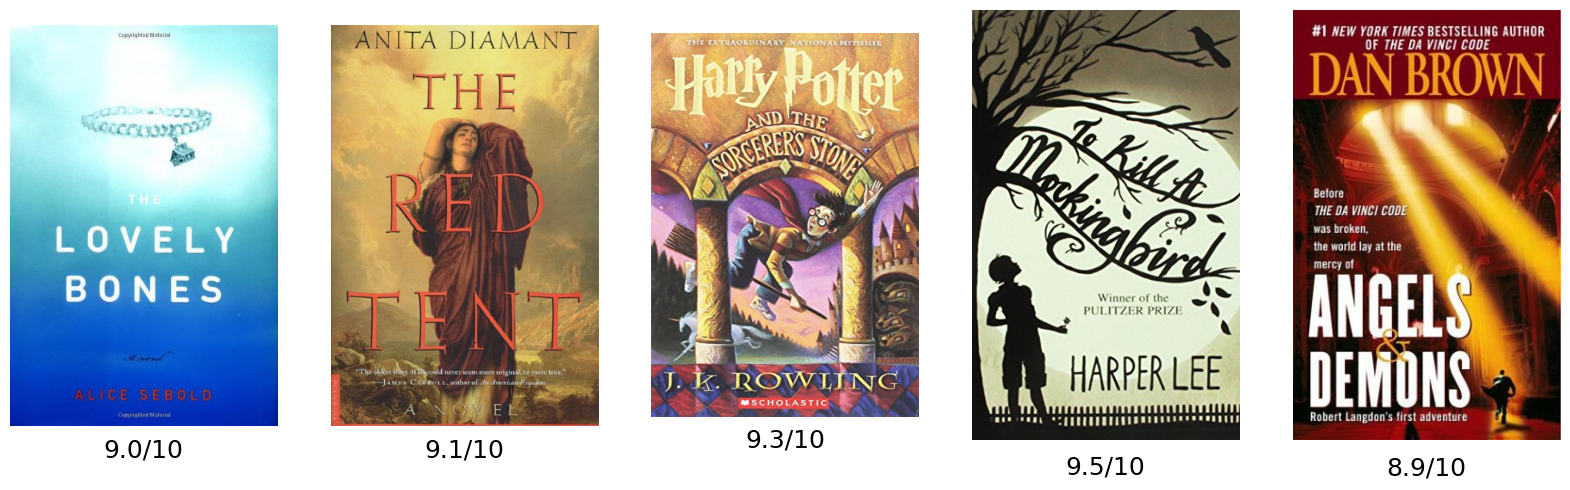

In [32]:
recommend(277427, 5)